In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

## Check grades

In [26]:
df = pd.read_csv(r'../../data/tidy/large/trajectories-mapped-powertrain-weight-grade-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
plt.hist(df['grade'], bins=10, edgecolor='black') 
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Histogram of Grades')
plt.show()

In [ ]:
plt.hist(df['elevation']/1000, bins=10, edgecolor='black') 
plt.xlabel('Elevation (km)')
plt.ylabel('Frequency')
plt.title('Histogram of elevation')
plt.show()

In [ ]:
df['elevation'].mean()/1000

## Check MPGs

### BEB

In [ ]:
df = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-12212023.csv', delimiter=',', skiprows=0, low_memory=False)

In [ ]:
validation_beb= pd.read_excel(r'../../data/tidy/BEB-validation.xlsx')

In [ ]:
df_beb=df[df['Powertrain'] == 'electric'].copy()
df_cdb=df[df['Powertrain'] == 'conventional'].copy()
df_heb=df[df['Powertrain'] == 'hybrid'].copy()

In [ ]:
# Convert date columns to datetime if they are not already
df_beb['Date'] = pd.to_datetime(df_beb['Date'])
validation_beb['Transaction Date'] = pd.to_datetime(validation_beb['Transaction Date'])

# Group by Date and Vehicle in df_beb and sum the Energy
grouped_energy = df_beb.groupby(['Date', 'Vehicle'])[['Energy', 'dist']].sum().reset_index()

# Merge the dataframes
merged_df = pd.merge(validation_beb, grouped_energy, 
                     left_on=['Transaction Date', 'Equipment ID'], 
                     right_on=['Date', 'Vehicle'], 
                     how='left')

In [ ]:
# Drop rows where 'trip' or 'Predicted Energy' is NaN
merged_df = merged_df.dropna(subset=['trip', 'Energy'])

# Drop rows where 'trip' or 'Predicted Energy' is 0
merged_df = merged_df.query("trip != 0 and `Energy` != 0")
merged_df

In [ ]:
merged_df['actual_mpg']=merged_df['dist']/merged_df['trip']
merged_df['pred_mpg']=merged_df['dist']/merged_df['Energy']
plt.hist(merged_df['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of actual MPkWhs for BEB')
plt.show()

In [ ]:
merged_df['actual_mpg'].mean()

low_percentile_value 0.20210344804385613
high_percentile_value 0.6934810188270023


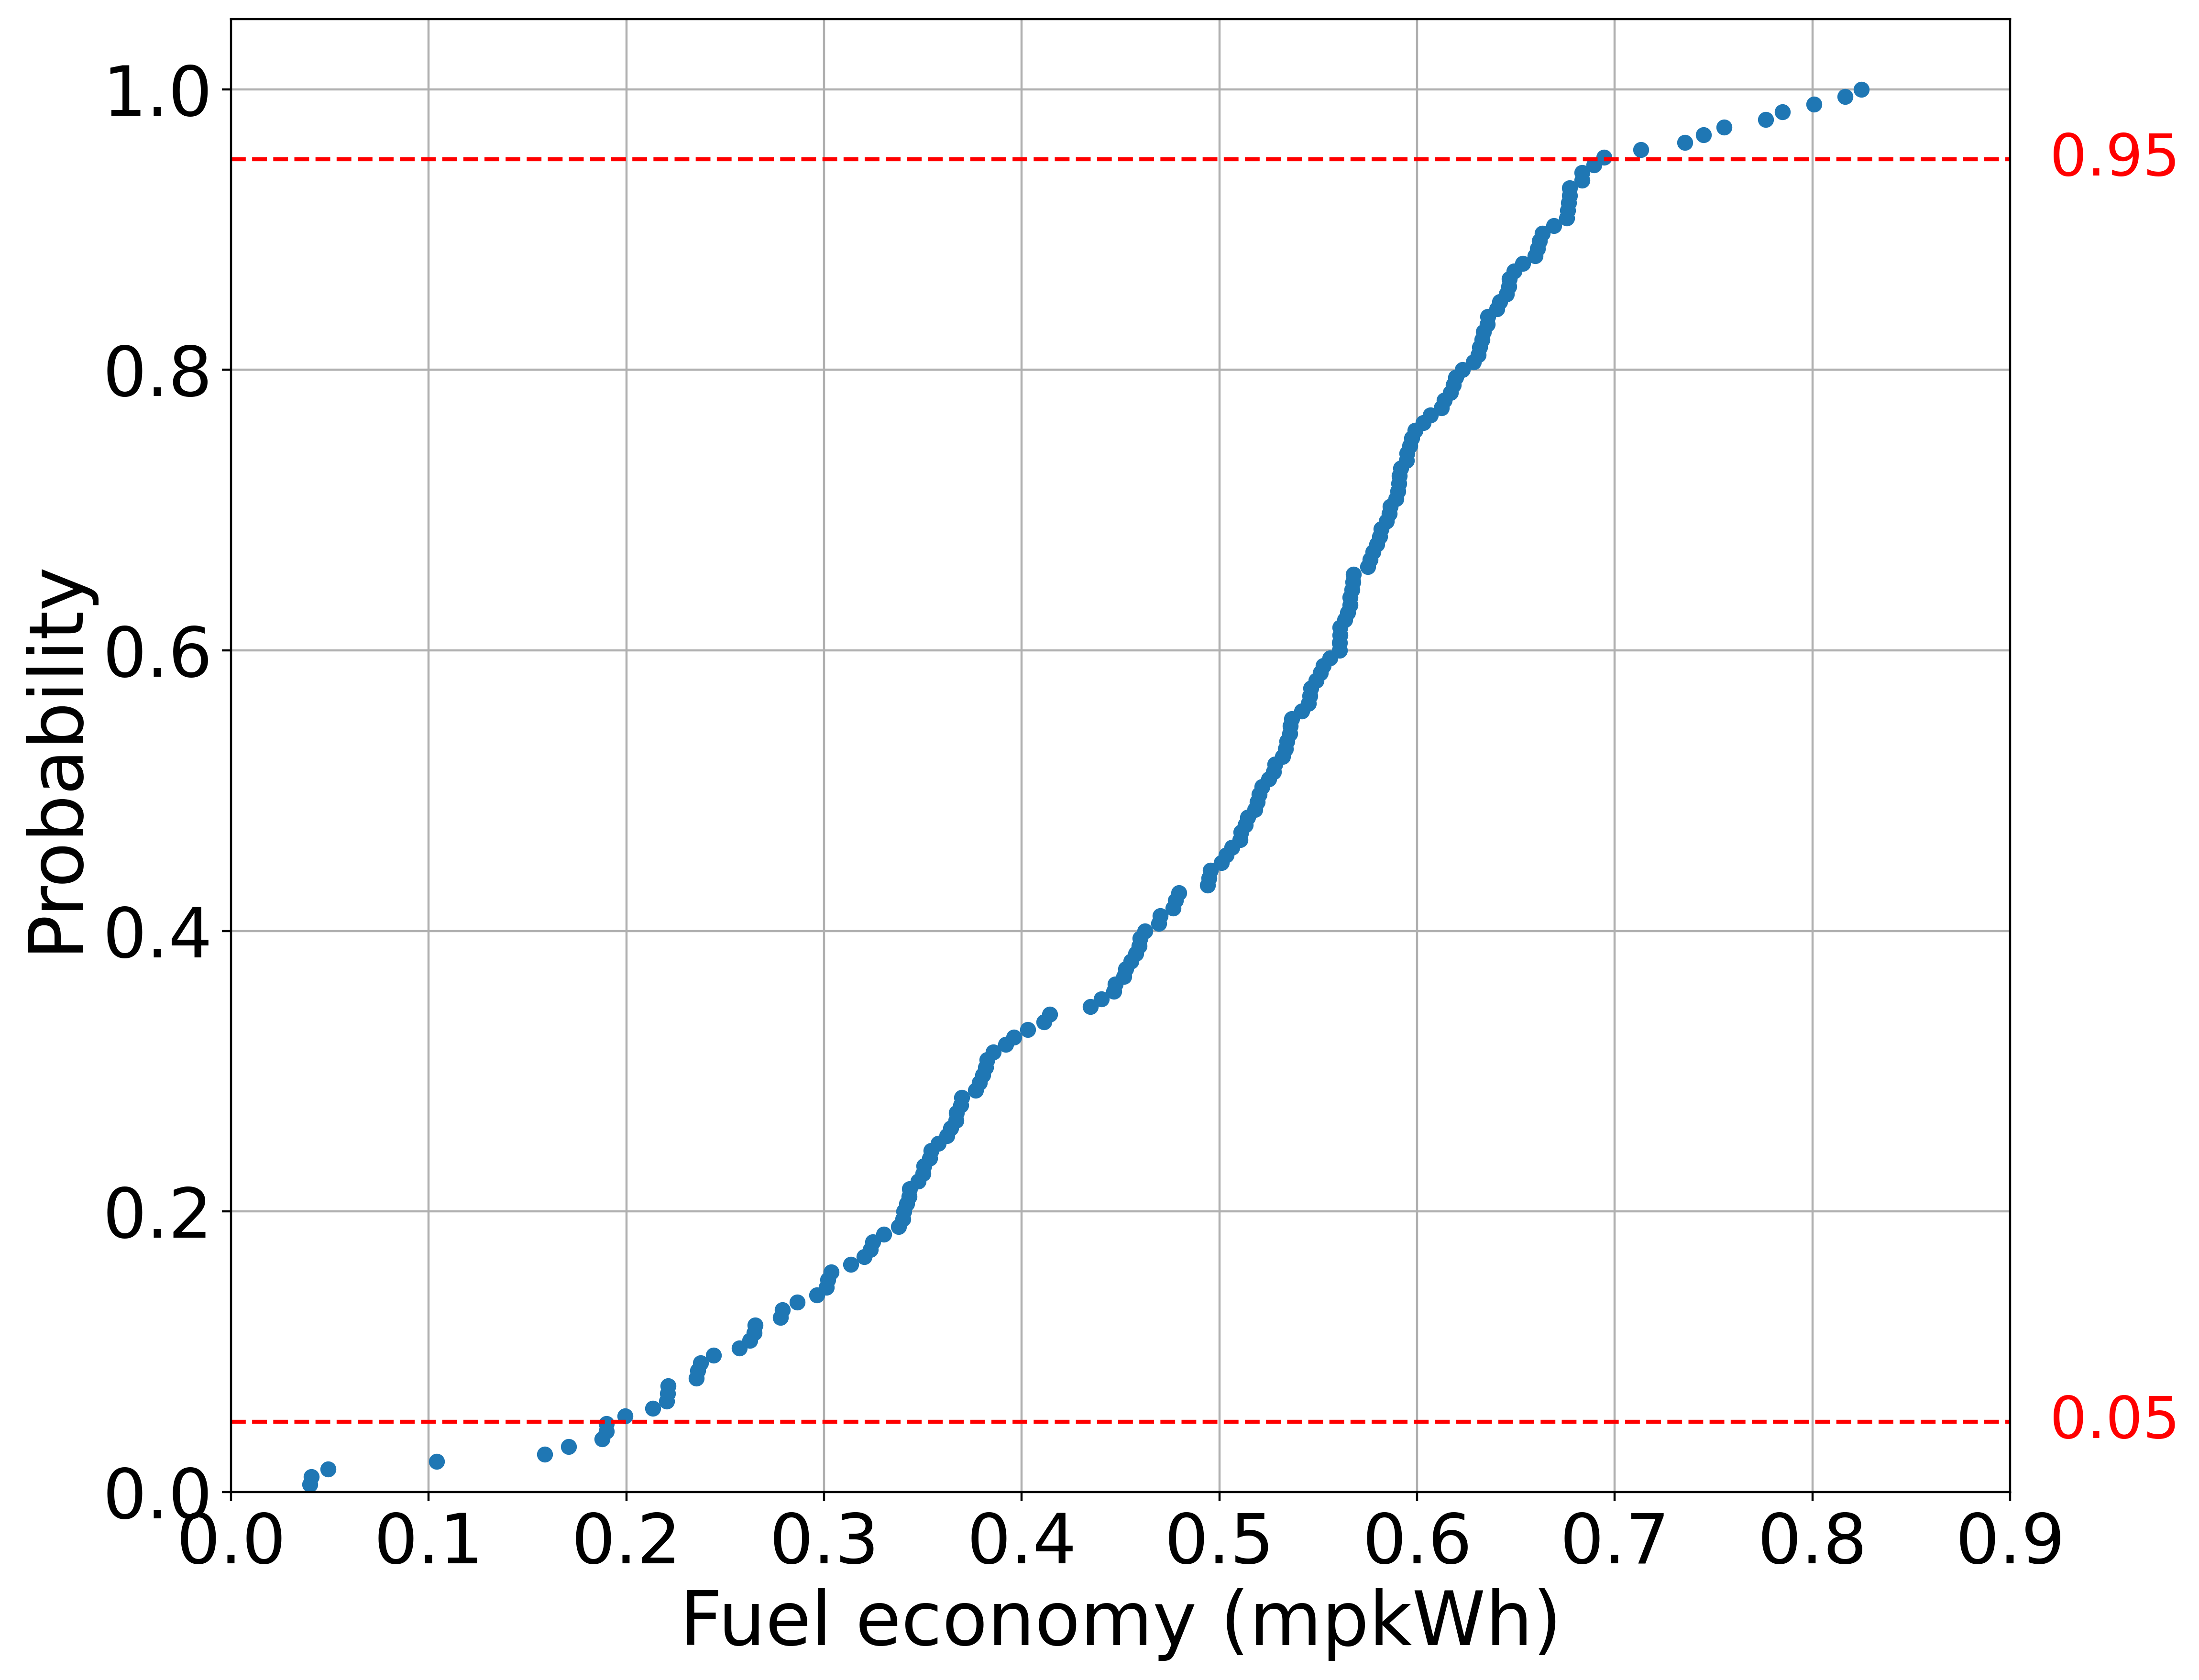

In [160]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10), dpi=400)

# Assuming merged_df['actual_mpg'] contains your data
data = merged_df['actual_mpg']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none', markersize=10)

# Calculate the data values at 0.1% and 99.99% percentiles
low_percentile_value = np.percentile(data, 5)
print("low_percentile_value",low_percentile_value)
high_percentile_value = np.percentile(data, 95)
print("high_percentile_value",high_percentile_value)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
plt.text(0.92, 0.05, '0.05', verticalalignment='center', color='r', fontsize=22)
plt.text(0.92, 0.95, '0.95', verticalalignment='center', color='r', fontsize=22)


plt.xlabel('Fuel economy (mpkWh)', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.xlim([0, 0.9])  # Limiting x-axis to 0-30
plt.ylim([0, 1.05])  # Limiting x-axis to 0-30

plt.grid(True)
plt.show()



In [161]:
top_10_rows = merged_df.nlargest(10, 'actual_mpg')
print(top_10_rows)

     Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
100          1322  186.3     0.0       2022-08-11 2022-08-11   1322.0   
151          1322  189.8   284.3       2022-07-25 2022-07-25   1322.0   
104          1322  152.6     0.9       2022-08-19 2022-08-19   1322.0   
188          1321   16.9   121.1       2022-06-13 2022-06-13   1321.0   
142          1322  157.2   240.6       2022-07-13 2022-07-13   1322.0   
252          1321   80.5   234.8       2022-09-08 2022-09-08   1321.0   
196          1321   85.8     0.0       2022-06-24 2022-06-24   1321.0   
102          1322   92.8   395.4       2022-08-15 2022-08-15   1322.0   
113          7700   99.5   162.9       2022-07-07 2022-07-07   7700.0   
264          1321   19.1   157.9       2022-09-21 2022-09-21   1321.0   

         Energy        dist  actual_mpg  pred_mpg  
100  268.253212  153.645414    0.824720  0.572763  
151  214.995736  154.959114    0.816434  0.720754  
104  212.113633  122.193691    0.800745 

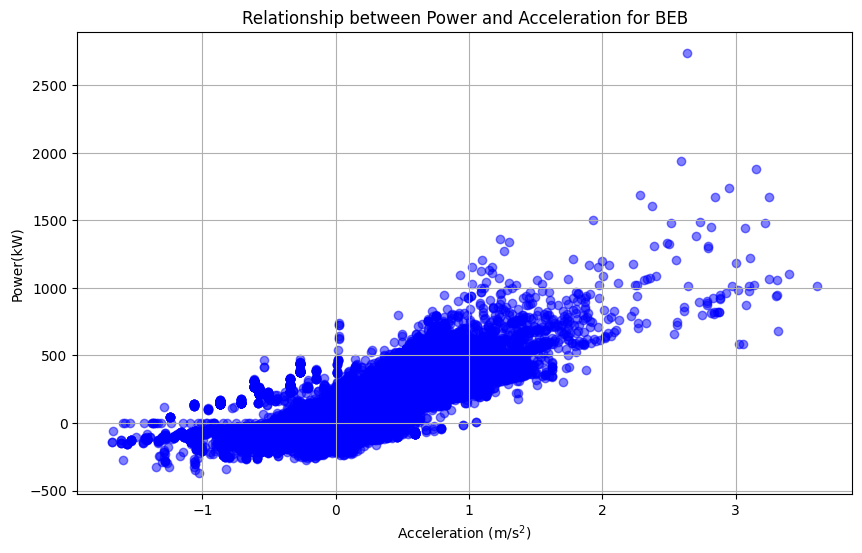

In [162]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_beb['Acceleration'],df_beb['power'], color='blue', alpha=0.5)
plt.title('Relationship between Power and Acceleration for BEB')
plt.xlabel(r'Acceleration (m/s$^2$)')
plt.ylabel('Power(kW)')
plt.grid(True)
plt.show()

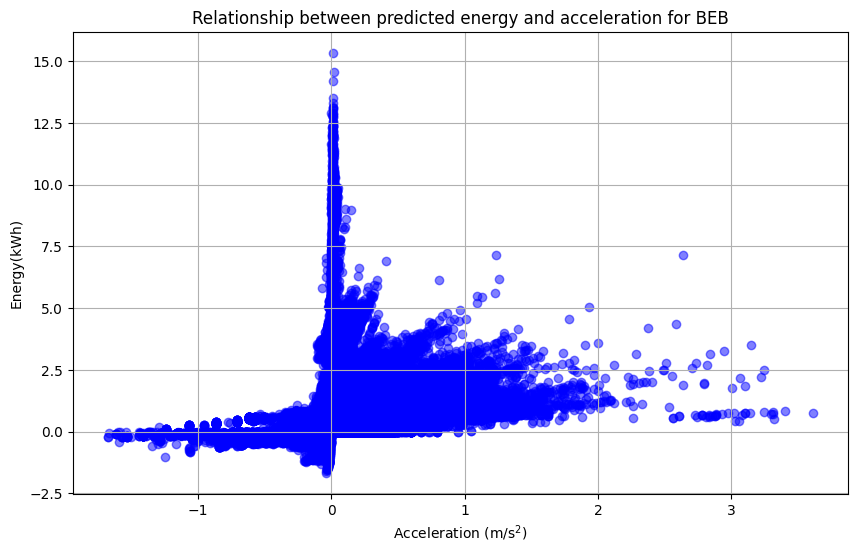

In [163]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_beb['Acceleration'],df_beb['Energy'], color='blue', alpha=0.5)
plt.title('Relationship between predicted energy and acceleration for BEB')
plt.xlabel(r'Acceleration (m/s$^2$)')
plt.ylabel('Energy(kWh)')
plt.grid(True)
plt.show()

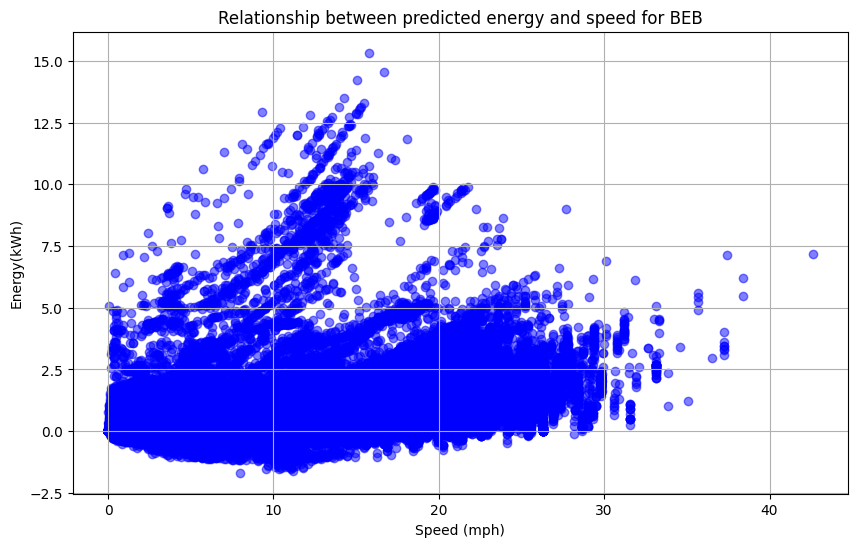

In [164]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_beb['Speed'],df_beb['Energy'], color='blue', alpha=0.5)
plt.title('Relationship between predicted energy and speed for BEB')
plt.xlabel(r'Speed (mph)')
plt.ylabel('Energy(kWh)')
plt.grid(True)
plt.show()

In [165]:
df_cdb.loc[df_cdb['power']>30000]

Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
5049646       5050247       5050247       3248633       3248633     3248633   
9386168       9387152       9387152       3138491       3138491     3138491   
9386169       9387153       9387153       3138466       3138466     3138466   
9386184       9387168       9387168       3138480       3138480     3138480   

             ServiceDateTime  DateKey             CalendarDate  Year  Month  \
5049646  2021-11-10 11:44:29     8618  2021-11-10 00:00:00.000  2021     11   
9386168  2021-11-08 15:40:39     8616  2021-11-08 00:00:00.000  2021     11   
9386169  2021-11-08 15:41:15     8616  2021-11-08 00:00:00.000  2021     11   
9386184  2021-11-08 16:08:17     8616  2021-11-08 00:00:00.000  2021     11   

         ...    VehicleModel Vehicle_mass  time_delta_in_seconds      dist  \
5049646  ...  NEW FLYER XD35        26900                     29  3.258536   
9386168  ...  NEW FLYER XD40        28250                     74  7.459224   
9386169  ...  NEW FLYER XD40        28250                     36  6.999998   
9386184  ...  NEW FLYER XD40        28250                     61  6.485929   

              Speed Acceleration  elevation     grade          power  \
5049646  180.831201     3.867568       74.0  0.002669   53550.242665   
9386168  162.222401     1.339787       85.0  0.001915   34368.806732   
9386169  312.927906     2.601226       72.0 -0.001154  232429.425285   
9386184  171.116248     1.668396       86.0  0.000096   40738.510174   

              Energy  
5049646   268.521615  
9386168   310.898677  
9386169  5400.796118  
9386184   345.589658  

[4 rows x 47 columns]

In [166]:
df_cdb=df_cdb.loc[df_cdb['power']<30000]

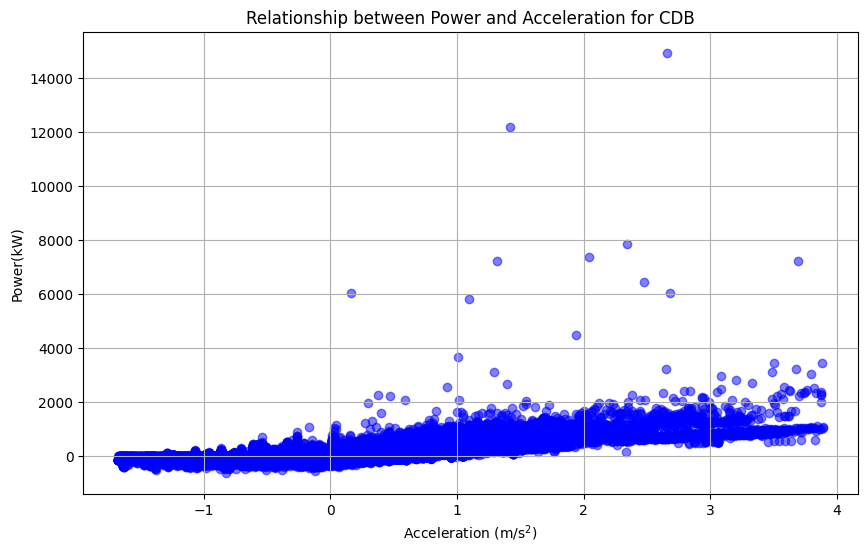

In [167]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cdb['Acceleration'],df_cdb['power'], color='blue', alpha=0.5)
plt.title('Relationship between Power and Acceleration for CDB')
plt.xlabel(r'Acceleration (m/s$^2$)')
plt.ylabel('Power(kW)')
plt.grid(True)
plt.show()

In [168]:
df_heb.loc[df_heb['power']>10000]

Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
6454114       6454837       6454837       3139979       3139979     3139979   
6454115       6454838       6454838       3140232       3140232     3140232   
6454119       6454842       6454842       3139981       3139981     3139981   
6454147       6454873       6454873       3140260       3140260     3140260   

             ServiceDateTime  DateKey             CalendarDate  Year  Month  \
6454114  2021-11-08 09:10:19     8616  2021-11-08 00:00:00.000  2021     11   
6454115  2021-11-08 09:11:12     8616  2021-11-08 00:00:00.000  2021     11   
6454119  2021-11-08 09:14:07     8616  2021-11-08 00:00:00.000  2021     11   
6454147  2021-11-08 09:32:29     8616  2021-11-08 00:00:00.000  2021     11   

         ...     VehicleModel Vehicle_mass  time_delta_in_seconds      dist  \
6454114  ...  NEW FLYER XDE40        28250                     47  6.212168   
6454115  ...  NEW FLYER XDE40        28250                     53  6.065792   
6454119  ...  NEW FLYER XDE40        28250                     64  4.786467   
6454147  ...  NEW FLYER XDE40        28250                     51  4.762854   

              Speed Acceleration  elevation     grade         power  \
6454114  212.713102     2.696225       20.0 -0.004899  83519.906173   
6454115  184.187674    -0.334432       77.0  0.005837  46915.022908   
6454119  120.360502     1.016915       26.0 -0.005840  15565.830994   
6454147  150.295491     1.735923       33.0 -0.004956  30644.461887   

             Energy  
6454114  958.402386  
6454115  366.646795  
6454119   64.409503  
6454147  163.283485  

[4 rows x 47 columns]

In [169]:
df_heb=df_heb.loc[df_heb['power']<10000]

In [170]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_heb['Acceleration'],df_heb['power'], color='blue', alpha=0.5)
plt.title('Relationship between Power and Acceleration for HEB')
plt.xlabel(r'Acceleration (m/s$^2$)')
plt.ylabel('Power(kW)')
plt.grid(True)
plt.show()

In [171]:
# Calculate Absolute Percentage Error (APE) for each row
merged_df['APE'] = (abs(merged_df['trip'] - merged_df['Energy']) / merged_df['trip']) * 100
top_20_mape = merged_df.nlargest(20, 'APE')
top_20_mape

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
67           1323   30.0     0.0       2022-04-29 2022-04-29   1323.0   
211          1323   15.4    17.5       2022-05-16 2022-05-16   1323.0   
213          1321   89.8   154.6       2022-05-18 2022-05-18   1321.0   
217          1321   91.1     0.0       2022-05-25 2022-05-25   1321.0   
59           1323   40.5     0.0       2022-04-14 2022-04-14   1323.0   
215          1321   46.5     0.0       2022-05-20 2022-05-20   1321.0   
64           1323   23.0    22.0       2022-04-25 2022-04-25   1323.0   
63           1323   85.1   103.8       2022-04-21 2022-04-21   1323.0   
180          1321   62.4     0.0       2022-06-02 2022-06-02   1321.0   
187          1321   18.8     0.0       2022-06-10 2022-06-10   1321.0   
160          1421   21.0    50.6       2022-06-09 2022-06-09   1421.0   
227          1420   30.0     0.0       2022-09-08 2022-09-08   1420.0   
179          1321   75.3   202.3       2022-06-01 2022-06-01   1321.0   
71           1421  201.7     0.7       2022-08-05 2022-08-05   1421.0   
216          1321   42.7   139.7       2022-05-23 2022-05-23   1321.0   
83           1420  180.8     1.3       2022-08-25 2022-08-25   1420.0   
136          1322  191.6   319.3       2022-07-07 2022-07-07   1322.0   
181          1321   20.4    73.1       2022-06-03 2022-06-03   1321.0   
207          1321   22.5    23.3       2022-05-10 2022-05-10   1321.0   
182          1321   73.1     0.0       2022-06-04 2022-06-04   1321.0   

        Energy       dist  actual_mpg  pred_mpg        APE  
67    0.719148   1.470162    0.049005  2.044310  97.602839  
211   1.174602   0.626032    0.040651  0.532974  92.372712  
213   7.277881   3.577301    0.039836  0.491531  91.895456  
217   7.869509   9.470920    0.103962  1.203496  91.361681  
59    5.780246   9.528018    0.235260  1.648376  85.727788  
215   8.453208  10.272495    0.220914  1.215218  81.821058  
64    4.277350   6.098154    0.265137  1.425685  81.402825  
63   16.779333  14.524731    0.170678  0.865632  80.282805  
180  12.799041  15.230013    0.244071  1.189934  79.488717  
187   4.395580   4.440169    0.236179  1.010144  76.619257  
160   5.001789   4.184522    0.199263  0.836605  76.181958  
227   7.604508   5.632040    0.187735  0.740619  74.651639  
179  22.032782  11.944832    0.158630  0.542139  70.739997  
71   61.110726  56.042432    0.277850  0.917064  69.702168  
216  13.050026   9.114973    0.213465  0.698464  69.437877  
83   55.673815  51.784133    0.286417  0.930134  69.206961  
136  60.696077  58.168329    0.303593  0.958354  68.321463  
181   6.710598   6.934327    0.339918  1.033340  67.104912  
207   7.573510   4.273066    0.189914  0.564212  66.339958  
182  25.334762  17.363505    0.237531  0.685363  65.342323

## Validation

### BEB

In [172]:
merged_df['actual_mpg']=merged_df['dist']/merged_df['trip']
merged_df['pred_mpg']=merged_df['dist']/merged_df['Energy']

In [173]:
merged_df

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
0            3501   26.7    35.0       2022-06-01 2022-06-01   3501.0   
1            3501  167.1   182.7       2022-06-02 2022-06-02   3501.0   
3            3501  173.9   166.1       2022-06-06 2022-06-06   3501.0   
4            3501   74.3   180.0       2022-06-07 2022-06-07   3501.0   
5            3501   81.4   108.5       2022-06-08 2022-06-08   3501.0   
..            ...    ...     ...              ...        ...      ...   
269          1321  141.5     0.8       2022-09-26 2022-09-26   1321.0   
270          1321  139.1   390.0       2022-09-27 2022-09-27   1321.0   
271          1321  194.8     3.1       2022-09-28 2022-09-28   1321.0   
272          1321  116.0   387.8       2022-09-29 2022-09-29   1321.0   
273          1321  193.6     0.9       2022-09-30 2022-09-30   1321.0   

         Energy        dist  actual_mpg  pred_mpg        APE  
0     28.343057   15.759902    0.590259  0.556041   6.153771  
1    190.914851   96.860943    0.579659  0.507352  14.251856  
3    184.593329   97.573532    0.561090  0.528586   6.149125  
4    100.859819   44.192232    0.594781  0.438155  35.746728  
5     84.272231   43.615372    0.535815  0.517553   3.528539  
..          ...         ...         ...       ...        ...  
269  154.266417   88.931381    0.628490  0.576479   9.022203  
270  120.427327   63.968701    0.459876  0.531181  13.423921  
271  167.124633  102.720630    0.527313  0.614635  14.207067  
272   68.099622   42.246626    0.364195  0.620365  41.293429  
273  157.510242  100.532695    0.519280  0.638261  18.641404  

[185 rows x 11 columns]

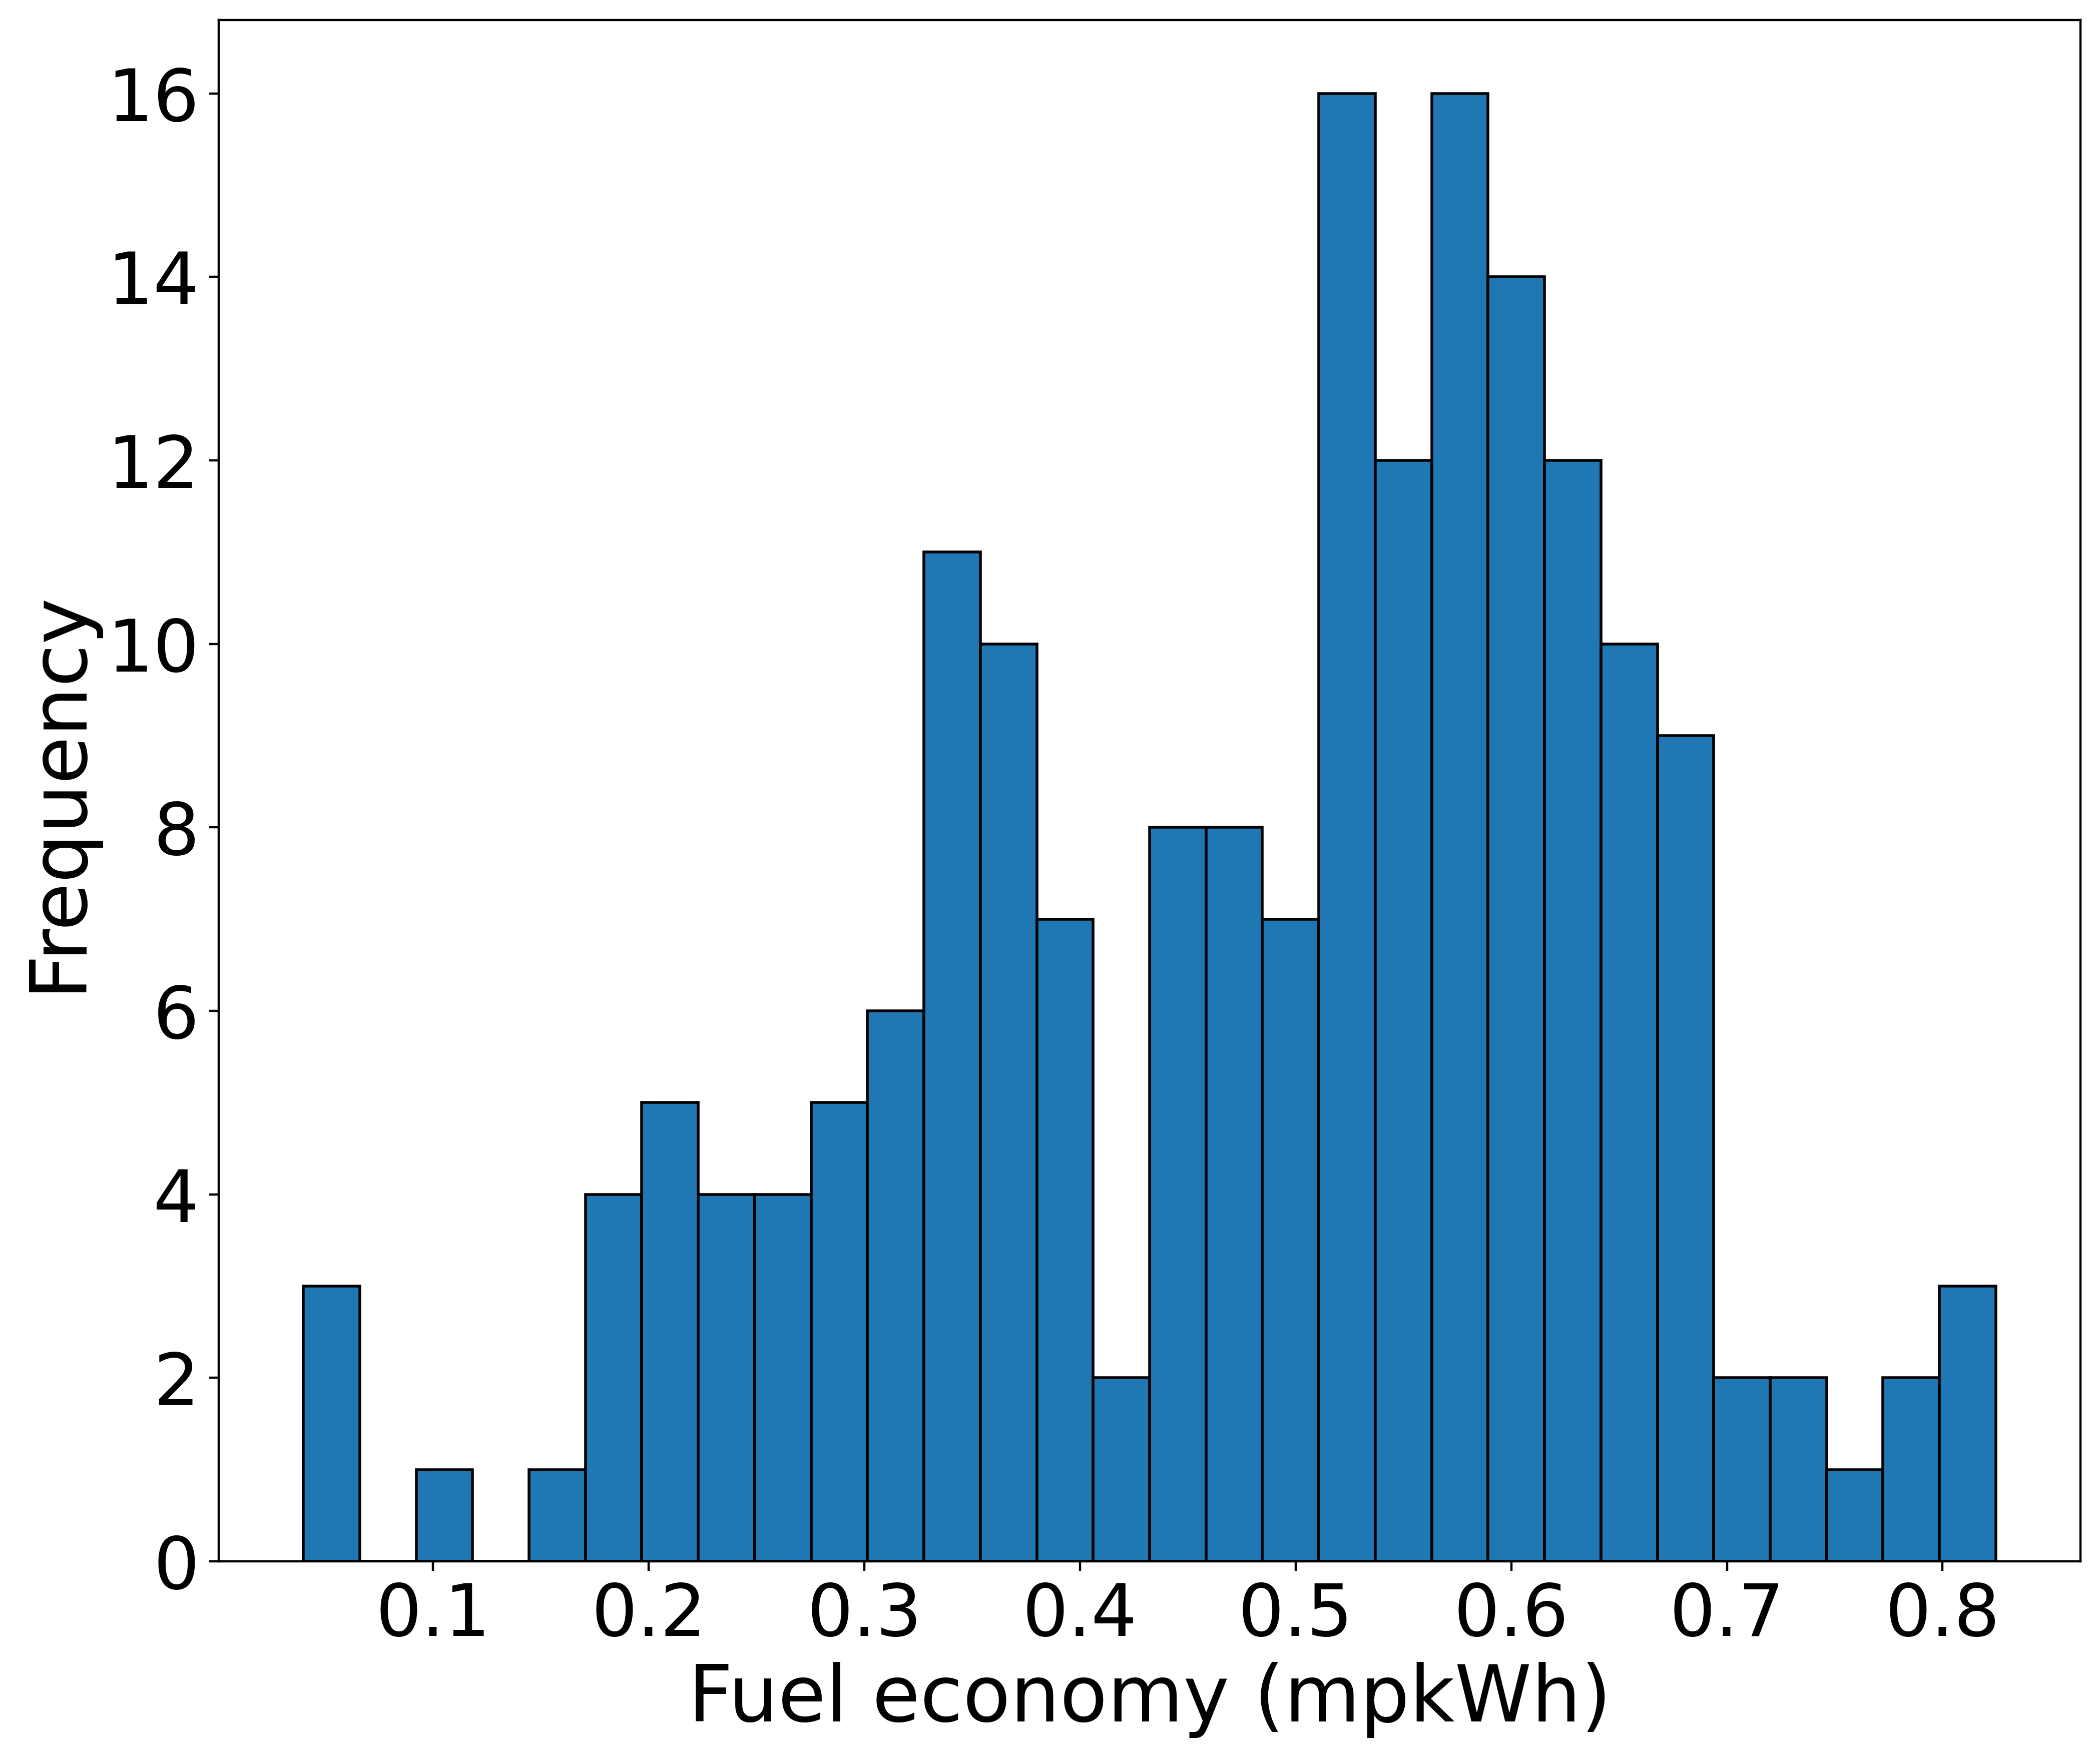

In [174]:
plt.figure(figsize=(12, 10), dpi=400)

plt.hist(merged_df['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('Fuel economy (mpkWh)',fontsize=28)
plt.ylabel('Frequency',fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

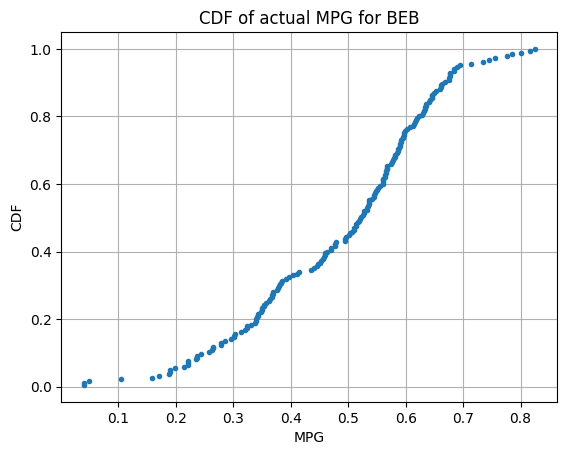

In [175]:
# Assuming merged_df['actual_mpg'] contains your data
data = merged_df['actual_mpg']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('MPG')
plt.ylabel('CDF')
plt.title('CDF of actual MPG for BEB')
plt.grid(True)
plt.show()


In [176]:
# Calculate the 1st and 99th percentiles
percentile_5 = merged_df['actual_mpg'].quantile(0.05)
percentile_95 = merged_df['actual_mpg'].quantile(0.95)

# Filter the DataFrame
#trimmed_validation_beb = merged_df[(merged_df['pred_mpg'] >= percentile_5) & (merged_df['pred_mpg'] <= percentile_95)]
trimmed_validation_beb = merged_df[(merged_df['actual_mpg'] >= percentile_5) & (merged_df['actual_mpg'] <= percentile_95)]
trimmed_validation_beb

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
0            3501   26.7    35.0       2022-06-01 2022-06-01   3501.0   
1            3501  167.1   182.7       2022-06-02 2022-06-02   3501.0   
3            3501  173.9   166.1       2022-06-06 2022-06-06   3501.0   
4            3501   74.3   180.0       2022-06-07 2022-06-07   3501.0   
5            3501   81.4   108.5       2022-06-08 2022-06-08   3501.0   
..            ...    ...     ...              ...        ...      ...   
269          1321  141.5     0.8       2022-09-26 2022-09-26   1321.0   
270          1321  139.1   390.0       2022-09-27 2022-09-27   1321.0   
271          1321  194.8     3.1       2022-09-28 2022-09-28   1321.0   
272          1321  116.0   387.8       2022-09-29 2022-09-29   1321.0   
273          1321  193.6     0.9       2022-09-30 2022-09-30   1321.0   

         Energy        dist  actual_mpg  pred_mpg        APE  
0     28.343057   15.759902    0.590259  0.556041   6.153771  
1    190.914851   96.860943    0.579659  0.507352  14.251856  
3    184.593329   97.573532    0.561090  0.528586   6.149125  
4    100.859819   44.192232    0.594781  0.438155  35.746728  
5     84.272231   43.615372    0.535815  0.517553   3.528539  
..          ...         ...         ...       ...        ...  
269  154.266417   88.931381    0.628490  0.576479   9.022203  
270  120.427327   63.968701    0.459876  0.531181  13.423921  
271  167.124633  102.720630    0.527313  0.614635  14.207067  
272   68.099622   42.246626    0.364195  0.620365  41.293429  
273  157.510242  100.532695    0.519280  0.638261  18.641404  

[165 rows x 11 columns]

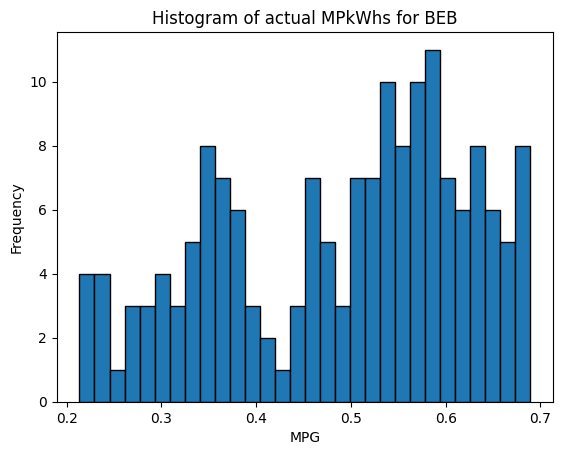

In [177]:
plt.hist(trimmed_validation_beb['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of actual MPkWhs for BEB')
plt.show()

In [178]:
from sklearn.model_selection import train_test_split

train_merged_df, test_merged_df = train_test_split(trimmed_validation_beb, test_size=0.2, random_state=42)

In [179]:
trimmed_validation_beb

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
0            3501   26.7    35.0       2022-06-01 2022-06-01   3501.0   
1            3501  167.1   182.7       2022-06-02 2022-06-02   3501.0   
3            3501  173.9   166.1       2022-06-06 2022-06-06   3501.0   
4            3501   74.3   180.0       2022-06-07 2022-06-07   3501.0   
5            3501   81.4   108.5       2022-06-08 2022-06-08   3501.0   
..            ...    ...     ...              ...        ...      ...   
269          1321  141.5     0.8       2022-09-26 2022-09-26   1321.0   
270          1321  139.1   390.0       2022-09-27 2022-09-27   1321.0   
271          1321  194.8     3.1       2022-09-28 2022-09-28   1321.0   
272          1321  116.0   387.8       2022-09-29 2022-09-29   1321.0   
273          1321  193.6     0.9       2022-09-30 2022-09-30   1321.0   

         Energy        dist  actual_mpg  pred_mpg        APE  
0     28.343057   15.759902    0.590259  0.556041   6.153771  
1    190.914851   96.860943    0.579659  0.507352  14.251856  
3    184.593329   97.573532    0.561090  0.528586   6.149125  
4    100.859819   44.192232    0.594781  0.438155  35.746728  
5     84.272231   43.615372    0.535815  0.517553   3.528539  
..          ...         ...         ...       ...        ...  
269  154.266417   88.931381    0.628490  0.576479   9.022203  
270  120.427327   63.968701    0.459876  0.531181  13.423921  
271  167.124633  102.720630    0.527313  0.614635  14.207067  
272   68.099622   42.246626    0.364195  0.620365  41.293429  
273  157.510242  100.532695    0.519280  0.638261  18.641404  

[165 rows x 11 columns]

In [180]:
test_merged_df

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
232          1420  228.1     1.0       2022-09-13 2022-09-13   1420.0   
192          1321   30.1     0.0       2022-06-17 2022-06-17   1321.0   
222          1420  181.4     0.8       2022-09-01 2022-09-01   1420.0   
76           1420  189.3   340.4       2022-08-17 2022-08-17   1420.0   
161          1421  232.1     0.0       2022-06-10 2022-06-10   1421.0   
36           3501  179.1   118.3       2022-08-11 2022-08-11   3501.0   
265          1321  292.4     0.5       2022-09-22 2022-09-22   1321.0   
71           1421  201.7     0.7       2022-08-05 2022-08-05   1421.0   
170          1421  215.4     1.0       2022-06-21 2022-06-21   1421.0   
244          1420  160.4   219.2       2022-09-27 2022-09-27   1420.0   
23           3501  164.1   181.4       2022-07-01 2022-07-01   3501.0   
143          1322   75.9    13.7       2022-07-14 2022-07-14   1322.0   
19           3501  199.0    88.8       2022-06-27 2022-06-27   3501.0   
97           1322  201.9    73.1       2022-08-08 2022-08-08   1322.0   
29           3501  214.8   320.6       2022-08-03 2022-08-03   3501.0   
37           3501  177.8   220.1       2022-08-12 2022-08-12   3501.0   
223          1420   79.5   386.9       2022-09-02 2022-09-02   1420.0   
177          1421   73.6     0.0       2022-06-29 2022-06-29   1421.0   
257          1321  184.5     0.2       2022-09-13 2022-09-13   1321.0   
20           3501  158.4   345.9       2022-06-28 2022-06-28   3501.0   
125          1421  162.2     0.3       2022-07-20 2022-07-20   1421.0   
22           3501  119.6   195.6       2022-06-30 2022-06-30   3501.0   
15           3501  202.9    99.2       2022-06-22 2022-06-22   3501.0   
11           3501  205.7   101.2       2022-06-15 2022-06-15   3501.0   
39           3501  233.4     0.0       2022-08-15 2022-08-15   3501.0   
260          1321   72.3   172.3       2022-09-16 2022-09-16   1321.0   
164          1421   29.5   389.6       2022-06-15 2022-06-15   1421.0   
78           1420  193.0    73.3       2022-08-19 2022-08-19   1420.0   
231          1420  177.7   248.2       2022-09-12 2022-09-12   1420.0   
270          1321  139.1   390.0       2022-09-27 2022-09-27   1321.0   
236          1420   71.3   314.0       2022-09-19 2022-09-19   1420.0   
129          1421  161.3    64.5       2022-07-27 2022-07-27   1421.0   
87           1420  162.4     0.7       2022-08-29 2022-08-29   1420.0   

         Energy        dist  actual_mpg  pred_mpg        APE  
232  315.761227  143.890624    0.630823  0.455694  38.431051  
192   11.726490    7.966788    0.264677  0.679384  61.041562  
222  223.140572  106.042993    0.584581  0.475230  23.010238  
76   227.144446  119.955034    0.633677  0.528100  19.991783  
161  115.996861   72.740585    0.313402  0.627091  50.022895  
36   194.116304   91.517109    0.510983  0.471455   8.384313  
265  311.832569  165.532568    0.566117  0.530838   6.645886  
71    61.110726   56.042432    0.277850  0.917064  69.702168  
170  202.660763  117.414314    0.545099  0.579364   5.914223  
244  182.290817   93.319484    0.581792  0.511926  13.647642  
23   185.587357   97.576880    0.594618  0.525773  13.094063  
143   69.640463   41.419885    0.545717  0.594768   8.247084  
19   139.717481   70.493336    0.354238  0.504542  29.790210  
97   187.861894  106.604880    0.528008  0.567464   6.953000  
29   312.208692  135.687219    0.631691  0.434604  45.348553  
37   122.686540   60.762594    0.341747  0.495267  30.997447  
223   57.486945   36.204150    0.455398  0.629780  27.689377  
177   62.780311   37.057945    0.503505  0.590280  14.700665  
257  195.980302  124.681304    0.675779  0.636193   6.222386  
20   211.565994   94.462516    0.596354  0.446492  33.564390  
125  190.444982  103.142561    0.635897  0.541587  17.413676  
22   156.652344   68.780002    0.575084  0.439061  30.980221  
15   136.963162   70.551210    0.347714  0.515111  32.497210  
11   139.8

In [181]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_merged_df['trip'], test_merged_df['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.26
RMSE: 51.75


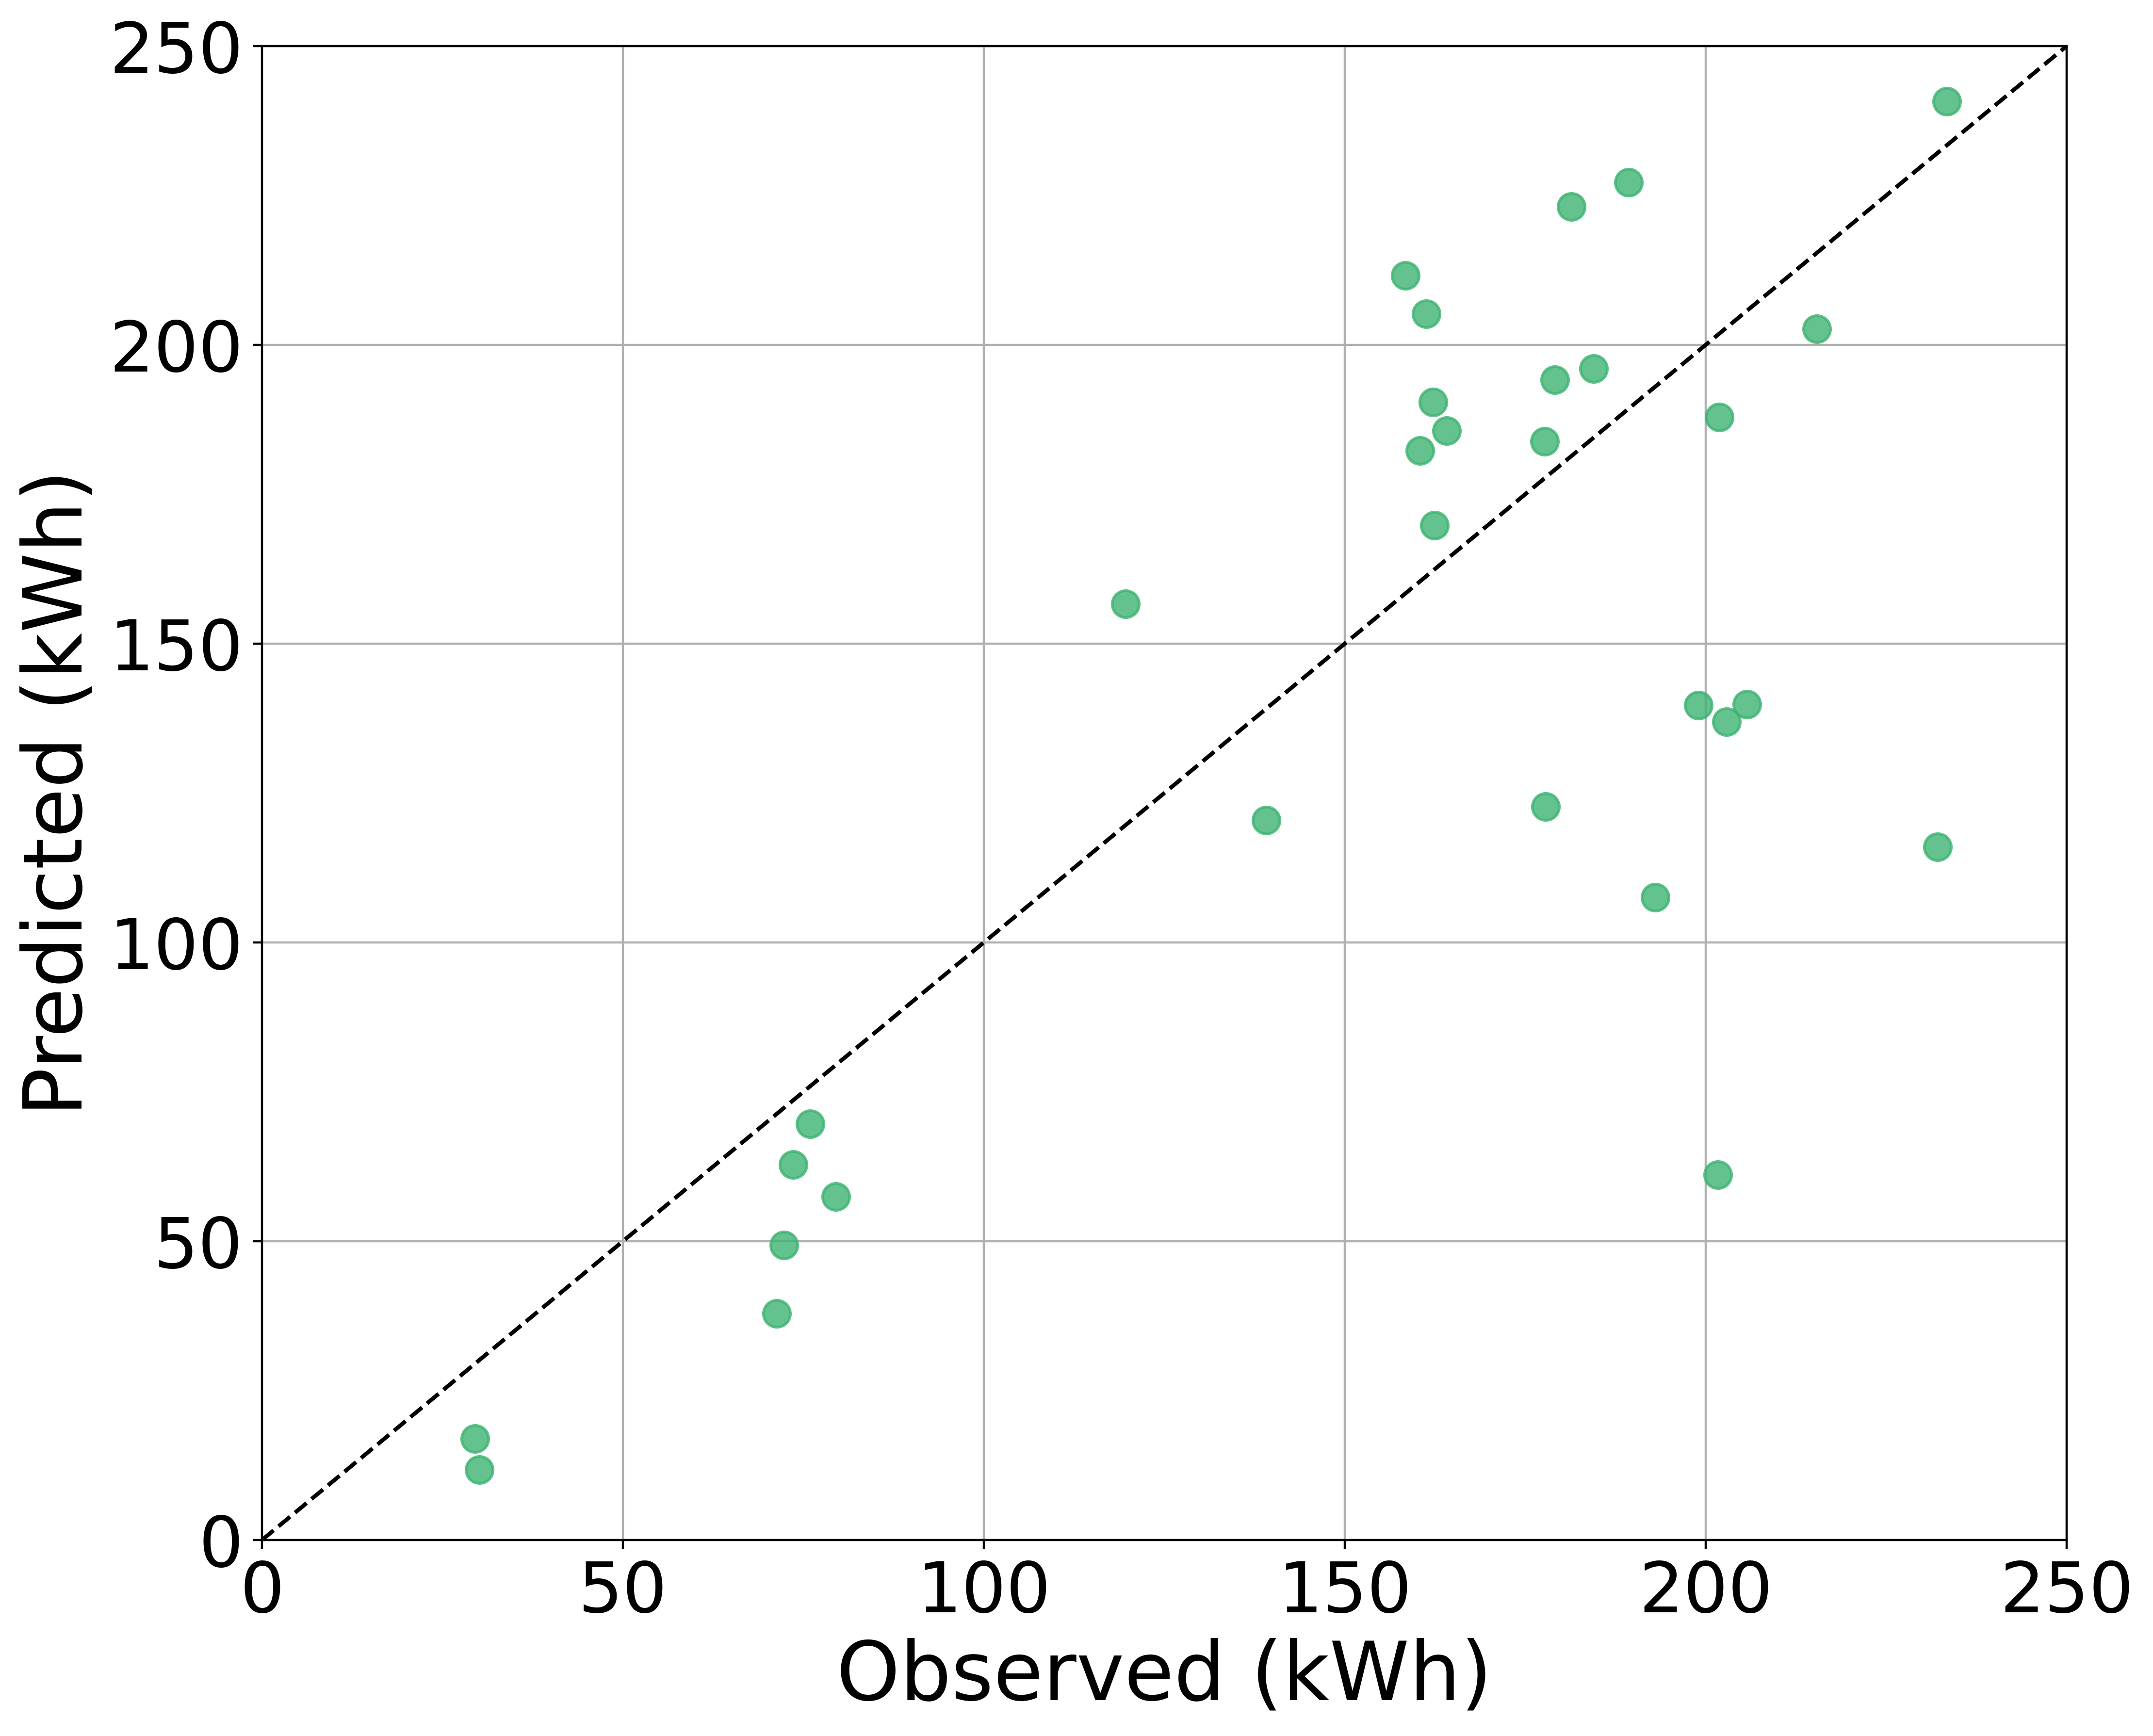

In [182]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(12, 10), dpi=400)

# create a scatter plot of predicted vs observed
plt.scatter(test_merged_df['trip'], test_merged_df['Energy'], alpha=0.8, s=100, color='mediumseagreen', zorder=2)

# Calculate the minimum and maximum limits for x and y axes
xlim = ylim = (0, 250)
xy_min = min(xlim[0], ylim[0])
xy_max = max(xlim[1], ylim[1])

# add a reference line showing perfect agreement between predicted and observed values
plt.plot([xy_min, xy_max], [xy_min, xy_max], color='black', linestyle='dashed', zorder=2)

# set the axis limits
plt.xlim(xlim)
plt.ylim(ylim)

# set the axis labels
plt.ylabel('Predicted (kWh)', fontsize=30)
plt.xlabel('Observed (kWh)', fontsize=30)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Adding gridlines to the plot
plt.grid(True, zorder=1)

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/BEB-observed-vs-predicted-sep2021-oct2022.png', dpi=400, bbox_inches='tight')

In [183]:
# Calculate Absolute Percentage Error (APE) for each row
trimmed_validation_beb['APE'] = (abs(trimmed_validation_beb['trip'] - trimmed_validation_beb['Energy']) / trimmed_validation_beb['trip']) * 100
top_20_mape = trimmed_validation_beb.nlargest(20, 'APE')
top_20_mape

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32428\2020000659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_validation_beb['APE'] = (abs(trimmed_validation_beb['trip'] - trimmed_validation_beb['Energy']) / trimmed_validation_beb['trip']) * 100


Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
59           1323   40.5     0.0       2022-04-14 2022-04-14   1323.0   
215          1321   46.5     0.0       2022-05-20 2022-05-20   1321.0   
64           1323   23.0    22.0       2022-04-25 2022-04-25   1323.0   
180          1321   62.4     0.0       2022-06-02 2022-06-02   1321.0   
187          1321   18.8     0.0       2022-06-10 2022-06-10   1321.0   
71           1421  201.7     0.7       2022-08-05 2022-08-05   1421.0   
216          1321   42.7   139.7       2022-05-23 2022-05-23   1321.0   
83           1420  180.8     1.3       2022-08-25 2022-08-25   1420.0   
136          1322  191.6   319.3       2022-07-07 2022-07-07   1322.0   
181          1321   20.4    73.1       2022-06-03 2022-06-03   1321.0   
182          1321   73.1     0.0       2022-06-04 2022-06-04   1321.0   
208          1321   20.2     0.0       2022-05-11 2022-05-11   1321.0   
218          1321   73.4   188.6       2022-05-26 2022-05-26   1321.0   
212          1321   46.3     0.3       2022-05-17 2022-05-17   1321.0   
62           1323  160.7    78.3       2022-04-19 2022-04-19   1323.0   
154          1421   30.8   158.9       2022-06-01 2022-06-01   1421.0   
228          1420   23.0   319.6       2022-09-09 2022-09-09   1420.0   
184          1321   41.0   135.9       2022-06-07 2022-06-07   1321.0   
192          1321   30.1     0.0       2022-06-17 2022-06-17   1321.0   
210          1321   19.9    91.5       2022-05-13 2022-05-13   1321.0   

        Energy       dist  actual_mpg  pred_mpg        APE  
59    5.780246   9.528018    0.235260  1.648376  85.727788  
215   8.453208  10.272495    0.220914  1.215218  81.821058  
64    4.277350   6.098154    0.265137  1.425685  81.402825  
180  12.799041  15.230013    0.244071  1.189934  79.488717  
187   4.395580   4.440169    0.236179  1.010144  76.619257  
71   61.110726  56.042432    0.277850  0.917064  69.702168  
216  13.050026   9.114973    0.213465  0.698464  69.437877  
83   55.673815  51.784133    0.286417  0.930134  69.206961  
136  60.696077  58.168329    0.303593  0.958354  68.321463  
181   6.710598   6.934327    0.339918  1.033340  67.104912  
182  25.334762  17.363505    0.237531  0.685363  65.342323  
208   7.153317   6.934327    0.343284  0.969386  64.587538  
218  26.560985  26.256707    0.357721  0.988544  63.813372  
212  17.090150  15.029144    0.324604  0.879404  63.088229  
62   59.358550  41.319387    0.257121  0.696098  63.062508  
154  11.396435   6.812022    0.221170  0.597733  62.998587  
228   8.625031   6.816973    0.296390  0.790371  62.499866  
184  15.562057  13.132784    0.320312  0.843898  62.043763  
192  11.726490   7.966788    0.264677  0.679384  61.041562  
210   8.064704   4.385333    0.220369  0.543769  59.473847

In [184]:
trimmed_validation_beb

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
0            3501   26.7    35.0       2022-06-01 2022-06-01   3501.0   
1            3501  167.1   182.7       2022-06-02 2022-06-02   3501.0   
3            3501  173.9   166.1       2022-06-06 2022-06-06   3501.0   
4            3501   74.3   180.0       2022-06-07 2022-06-07   3501.0   
5            3501   81.4   108.5       2022-06-08 2022-06-08   3501.0   
..            ...    ...     ...              ...        ...      ...   
269          1321  141.5     0.8       2022-09-26 2022-09-26   1321.0   
270          1321  139.1   390.0       2022-09-27 2022-09-27   1321.0   
271          1321  194.8     3.1       2022-09-28 2022-09-28   1321.0   
272          1321  116.0   387.8       2022-09-29 2022-09-29   1321.0   
273          1321  193.6     0.9       2022-09-30 2022-09-30   1321.0   

         Energy        dist  actual_mpg  pred_mpg        APE  
0     28.343057   15.759902    0.590259  0.556041   6.153771  
1    190.914851   96.860943    0.579659  0.507352  14.251856  
3    184.593329   97.573532    0.561090  0.528586   6.149125  
4    100.859819   44.192232    0.594781  0.438155  35.746728  
5     84.272231   43.615372    0.535815  0.517553   3.528539  
..          ...         ...         ...       ...        ...  
269  154.266417   88.931381    0.628490  0.576479   9.022203  
270  120.427327   63.968701    0.459876  0.531181  13.423921  
271  167.124633  102.720630    0.527313  0.614635  14.207067  
272   68.099622   42.246626    0.364195  0.620365  41.293429  
273  157.510242  100.532695    0.519280  0.638261  18.641404  

[165 rows x 11 columns]

### Residual analysis

In [185]:
test_merged_df['Residuals'] = test_merged_df['Energy'] - test_merged_df['trip']

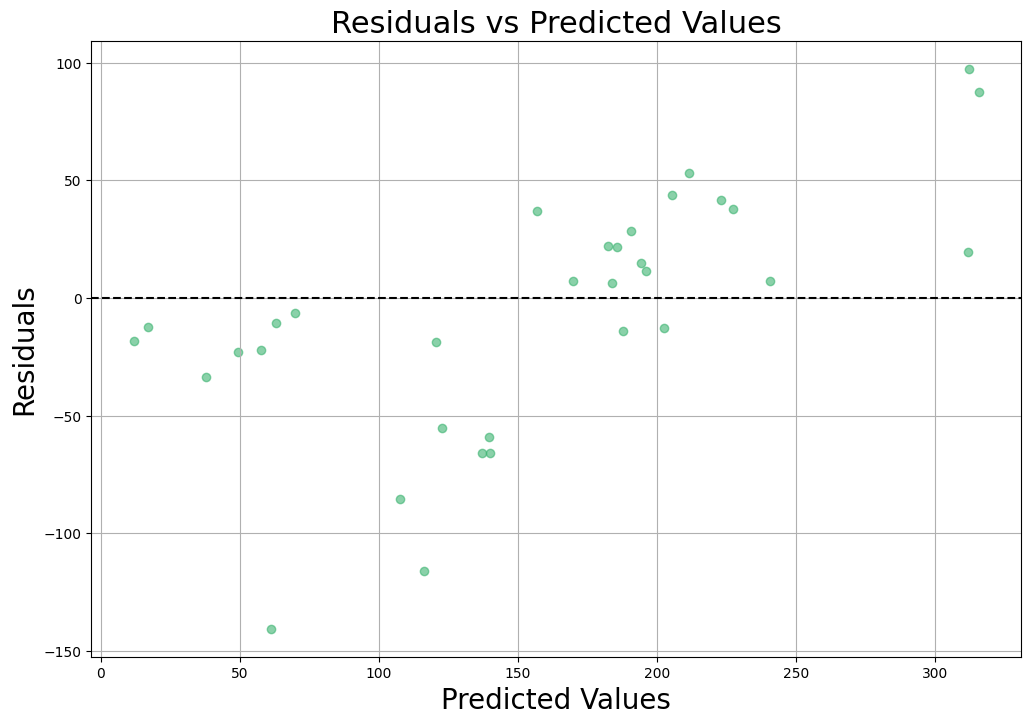

In [186]:
plt.figure(figsize=(12, 8))
plt.scatter(test_merged_df['Energy'], test_merged_df['Residuals'], alpha=0.6, color='mediumseagreen')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Predicted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Predicted Values', fontsize=22)
plt.grid(True)
plt.show()


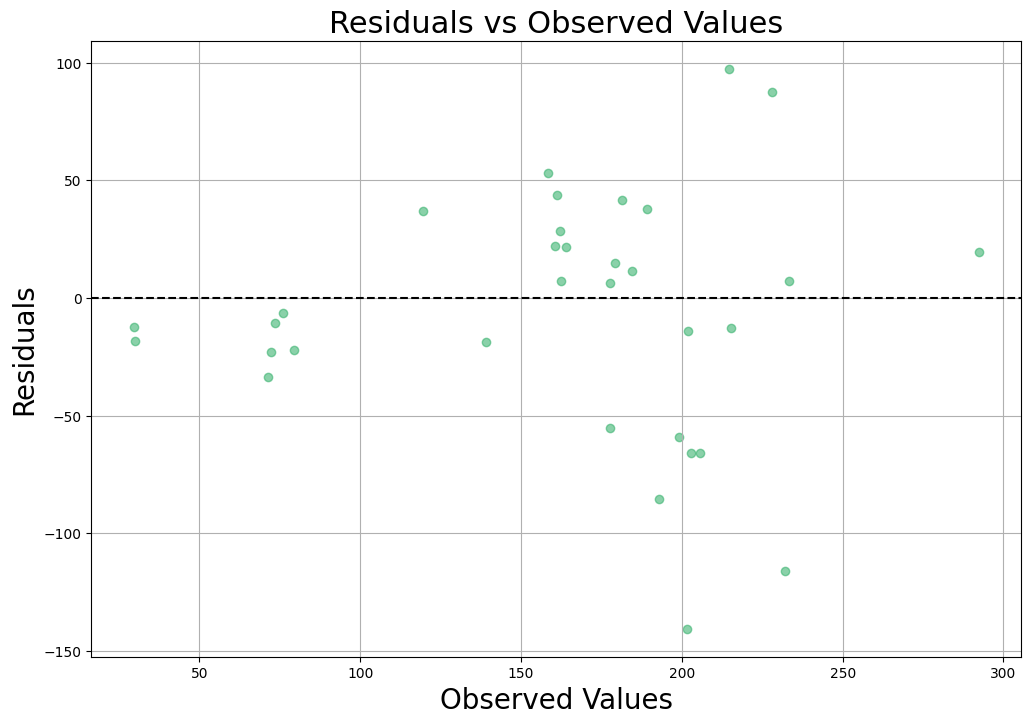

In [187]:
plt.figure(figsize=(12, 8))
plt.scatter(test_merged_df['trip'], test_merged_df['Residuals'], alpha=0.6, color='mediumseagreen')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Observed Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Observed Values', fontsize=22)
plt.grid(True)
plt.show()


In [188]:
plt.figure(figsize=(12, 8))
plt.scatter(test_merged_df['dist'], test_merged_df['Residuals'], alpha=0.6, color='mediumseagreen')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Distance', fontsize=22)
plt.grid(True)
plt.show()


In [189]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Mean Absolute Error (MAE):", mae)


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_merged_df['trip'], test_merged_df['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)

from sklearn.metrics import r2_score
r2 = r2_score(test_merged_df['trip'], test_merged_df['Energy'])
print("R-squared (R²):", r2)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

import numpy as np

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)


Mean Absolute Error (MAE): 39.3168049138359
Root Mean Square Error (RMSE): 51.75010587083808
R-squared (R²): 0.2879055092572411
Mean Absolute Percentage Error (MAPE): 25.561516305475777
Symmetric Mean Absolute Percentage Error (sMAPE): 29.223074586368067
Median Absolute Percentage Error (MdAPE): 27.22201067822796


## Calculate validation performance metrics using average values

#### BEB: 0.44 mpkwh = 2.27 kwhpm
##### The commonly quoted numbers are 25 to 35 kWh/100 miles (https://www.quora.com/How-much-electrical-energy-per-kilometer-does-an-electric-bus-consume)
#### BEB: 0.30 mpkwh = 3.33 kwhpm

In [190]:
test_merged_df['average_kwh']=test_merged_df['dist']*3.33
test_merged_df.head()

Equipment ID   trip  charge Transaction Date       Date  Vehicle  \
232          1420  228.1     1.0       2022-09-13 2022-09-13   1420.0   
192          1321   30.1     0.0       2022-06-17 2022-06-17   1321.0   
222          1420  181.4     0.8       2022-09-01 2022-09-01   1420.0   
76           1420  189.3   340.4       2022-08-17 2022-08-17   1420.0   
161          1421  232.1     0.0       2022-06-10 2022-06-10   1421.0   

         Energy        dist  actual_mpg  pred_mpg        APE   Residuals  \
232  315.761227  143.890624    0.630823  0.455694  38.431051   87.661227   
192   11.726490    7.966788    0.264677  0.679384  61.041562  -18.373510   
222  223.140572  106.042993    0.584581  0.475230  23.010238   41.740572   
76   227.144446  119.955034    0.633677  0.528100  19.991783   37.844446   
161  115.996861   72.740585    0.313402  0.627091  50.022895 -116.103139   

     average_kwh  
232   479.155776  
192    26.529404  
222   353.123166  
76    399.450262  
161   242.226148

In [191]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_merged_df['average_kwh'], test_merged_df['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 45.5202992279784


In [192]:
trimmed_validation_beb['Transaction Date'] = pd.to_datetime(trimmed_validation_beb['Transaction Date'])
trimmed_validation_beb = trimmed_validation_beb.set_index('Transaction Date')
trimmed_validation_beb = trimmed_validation_beb[['Energy','trip']].resample('W').sum()
trimmed_validation_beb = trimmed_validation_beb.reset_index()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32428\1077121597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_validation_beb['Transaction Date'] = pd.to_datetime(trimmed_validation_beb['Transaction Date'])


In [193]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
train_merged_df, test_merged_df = train_test_split(trimmed_validation_beb, test_size=0.2, random_state=42)

In [194]:
test_merged_df

Transaction Date       Energy    trip
8        2022-06-12  1026.198989  1248.2
16       2022-08-07  1603.817387  1864.7
0        2022-04-17   279.212863   346.9
23       2022-09-25  1228.796113  1123.7
11       2022-07-03   965.447155   929.6

In [195]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_merged_df['trip'], test_merged_df['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.13
RMSE: 163.86


In [196]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'ServiceDateTime' is a datetime object
test_merged_df['Transaction Date'] = pd.to_datetime(test_merged_df['Transaction Date'])
test_merged_df = test_merged_df.sort_values('Transaction Date')


# Set 'ServiceDateTime' as index for plotting purposes
test_merged_df.set_index('Transaction Date', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_merged_df))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_merged_df['Energy'], width=bar_width, color='mediumseagreen', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_merged_df['trip'], width=bar_width, color='mediumseagreen', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_merged_df.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=26)
plt.yticks(fontsize=26)


plt.ylabel('Energy (kWh)', fontsize=30)
plt.legend(fontsize=28)
plt.tight_layout() 

# Save the figure with high resolution
plt.savefig(r'../../figures/weekly-BEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'ServiceDateTime' is a datetime object
test_merged_df['Transaction Date'] = pd.to_datetime(test_merged_df['Transaction Date'])
test_merged_df = test_merged_df.sort_values('Transaction Date')

# Set 'ServiceDateTime' as index for plotting purposes
test_merged_df.set_index('Transaction Date', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_merged_df))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_merged_df['Energy'], width=bar_width, color='mediumseagreen', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_merged_df['trip'], width=bar_width, color='mediumseagreen', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_merged_df.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('Energy (kWh)', fontsize=30)
plt.legend(fontsize=28)

# Annotate the plot with MAPE value
plt.text(0.95, 0.95, 'MAPE = 13%', fontsize=28, transform=plt.gca().transAxes, 
         ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()

# Save the figure with high resolution
plt.savefig(r'../../figures/weekly-BEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


KeyError: 'Transaction Date'

In [124]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Mean Absolute Error (MAE):", mae)


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_merged_df['trip'], test_merged_df['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)

from sklearn.metrics import r2_score
r2 = r2_score(test_merged_df['trip'], test_merged_df['Energy'])
print("R-squared (R²):", r2)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

import numpy as np

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(test_merged_df['trip'], test_merged_df['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)


Mean Absolute Error (MAE): 138.30280602228353
Root Mean Square Error (RMSE): 163.8633253272001
R-squared (R²): 0.8884410057677168
Mean Absolute Percentage Error (MAPE): 12.899433007680758
Symmetric Mean Absolute Percentage Error (sMAPE): 13.780822130020036
Median Absolute Percentage Error (MdAPE): 13.990594351497665


### HEB

In [3]:
validation_heb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-heb-oct2021-sep2022-12212023.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
validation_heb['actual_mpg']=validation_heb['dist']/validation_heb['Qty']
validation_heb['pred_mpg']=validation_heb['dist']/validation_heb['Energy']

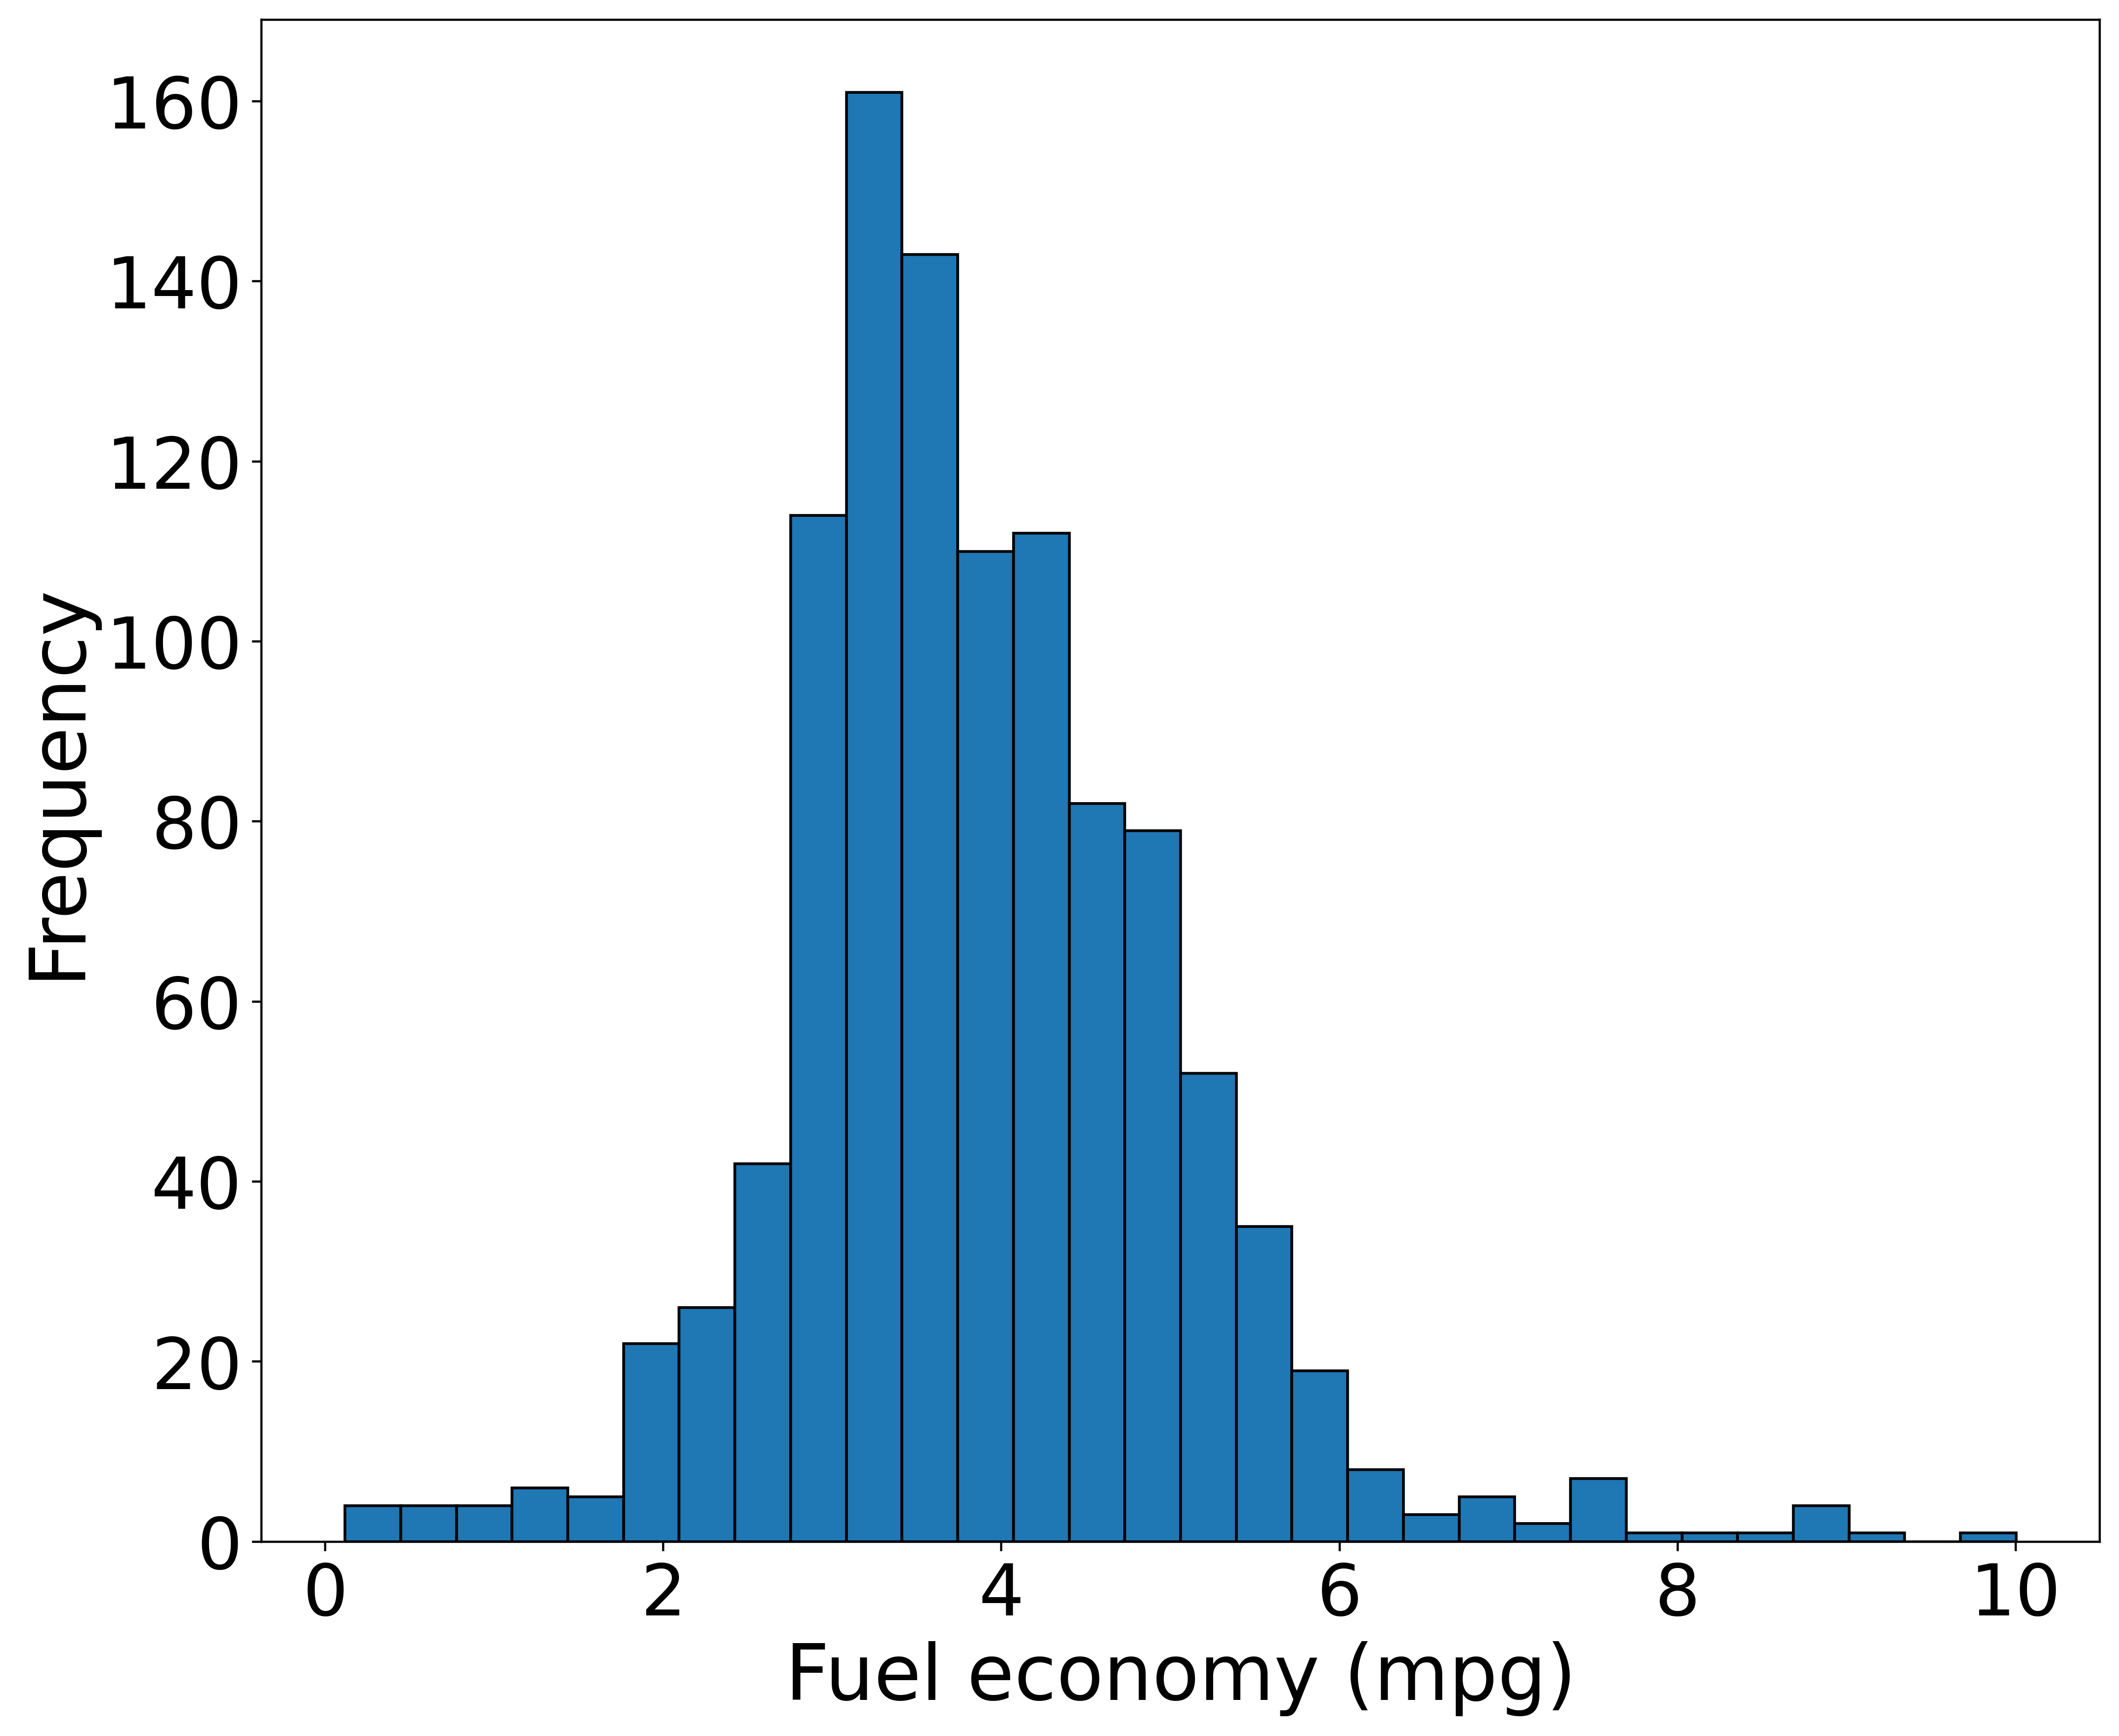

In [5]:
plt.figure(figsize=(12, 10), dpi=400)

plt.hist(validation_heb['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('Fuel economy (mpg)',fontsize=28)
plt.ylabel('Frequency',fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
#plt.title('Histogram of actual MPGs for heb')
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_df['actual_mpg'] contains your data
data = validation_heb['actual_mpg']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('MPG')
plt.ylabel('CDF')
plt.title('CDF of actual MPG for HEB')
plt.grid(True)
plt.show()


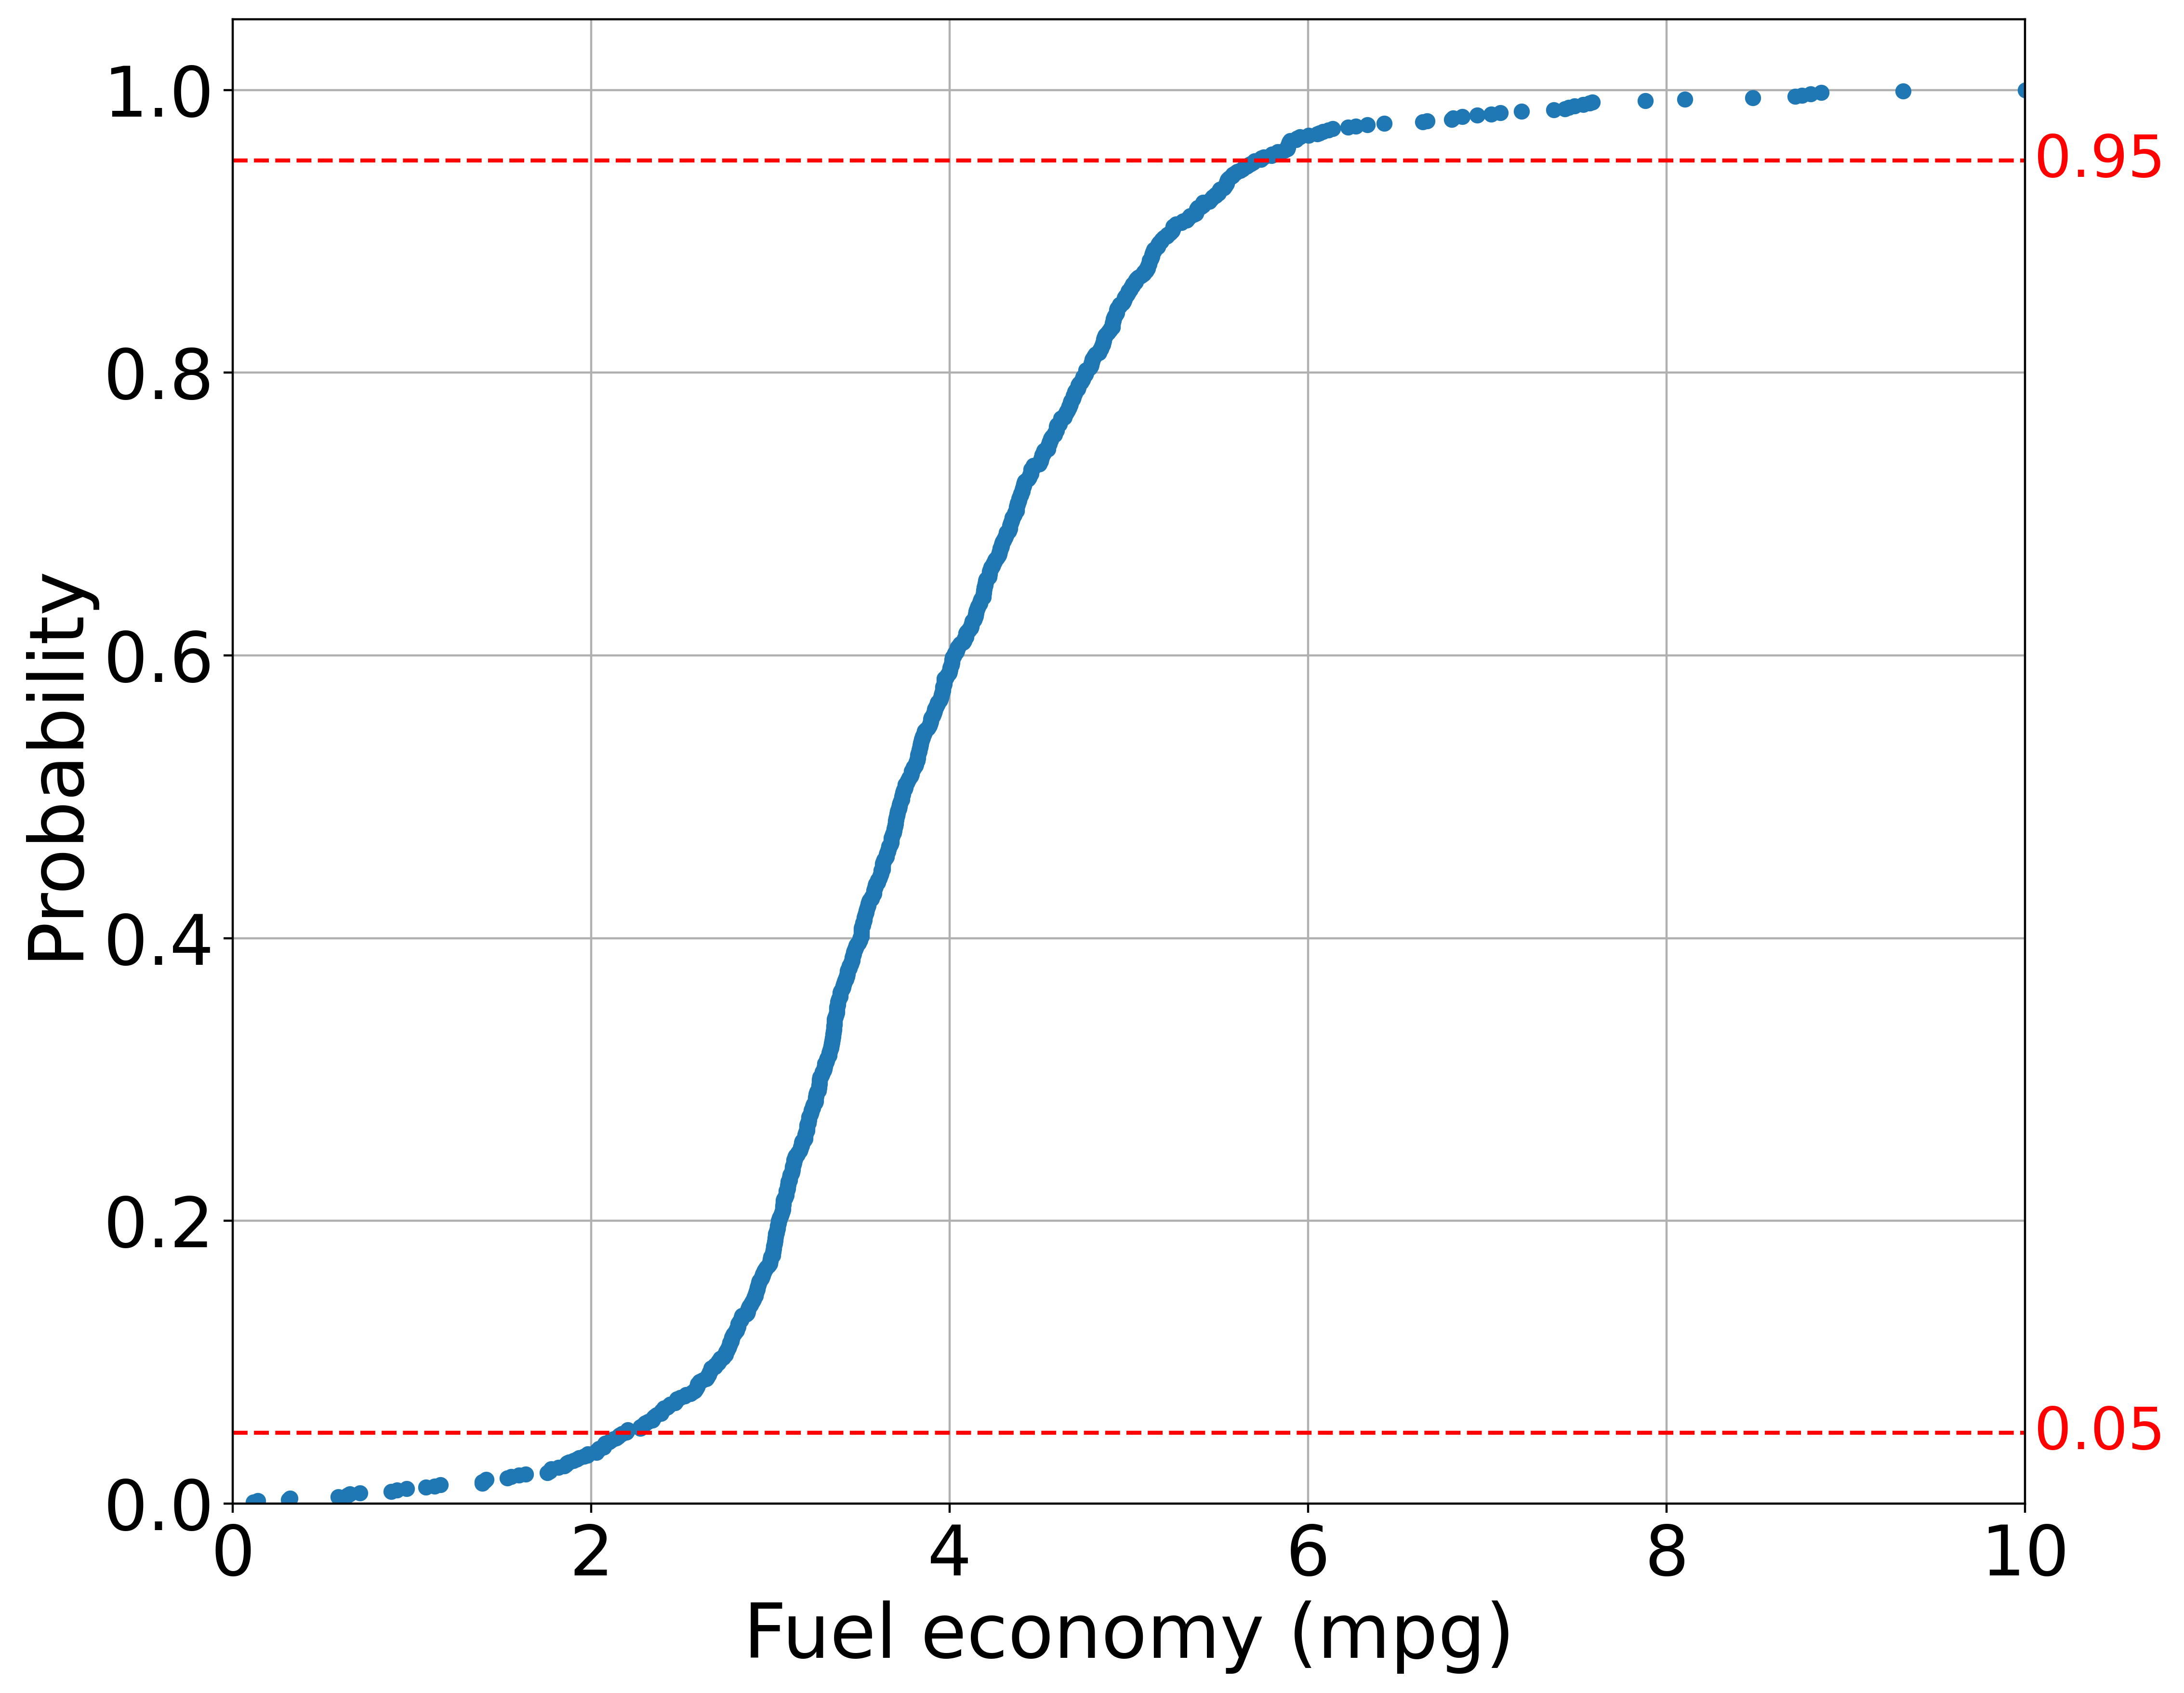

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10), dpi=400)

# Assuming merged_df['actual_mpg'] contains your data
data = validation_heb['actual_mpg']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none', markersize=10)

# Calculate the data values at 0.1% and 99.99% percentiles
low_percentile_value = np.percentile(data_sorted, 0.1)
high_percentile_value = np.percentile(data_sorted, 99.99)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
#plt.text(max(data_sorted)*1.05, 0.05, '0.05', verticalalignment='center', color='r', fontsize=22)
#plt.text(max(data_sorted)*1.05, 0.95, '0.95', verticalalignment='center', color='r', fontsize=22)
plt.text(10.05, 0.05, '0.05', verticalalignment='center', color='r', fontsize=22)
plt.text(10.05, 0.95, '0.95', verticalalignment='center', color='r', fontsize=22)

plt.xlabel('Fuel economy (mpg)', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.xlim([0, 10])  # Limiting x-axis to 0-30
plt.ylim([0, 1.05])  # Limiting x-axis to 0-30

plt.grid(True)
plt.show()



In [8]:
# Calculate the 1st and 99th percentiles
percentile_5 = validation_heb['actual_mpg'].quantile(0.05)
percentile_95 = validation_heb['actual_mpg'].quantile(0.95)

# Filter the DataFrame
#trimmed_validation_heb = validation_heb[(validation_heb['pred_mpg'] >= percentile_5) & (validation_heb['pred_mpg'] <= percentile_95)]
#trimmed_validation_heb = trimmed_validation_heb[(trimmed_validation_heb['actual_mpg'] >= percentile_5) & (trimmed_validation_heb['actual_mpg'] <= percentile_95)]
trimmed_validation_heb = validation_heb[(validation_heb['actual_mpg'] >= percentile_5) & (validation_heb['actual_mpg'] <= percentile_95)]

In [10]:
trimmed_validation_heb['pred_mpg'].mean()

3.6017607100055558

In [11]:
trimmed_validation_heb['actual_mpg'].mean()

3.8535292450617074

In [131]:
train_df_heb_vehicle, test_df_heb_vehicle = train_test_split(trimmed_validation_heb, test_size=0.2, random_state=42)

In [132]:
# Compute MAPE
mape = mean_absolute_percentage_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 23.67
RMSE: 8.98


In [133]:
plt.hist(trimmed_validation_heb['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of actual MPGs for heb')
plt.show()

In [134]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(12, 10), dpi=400)

# create a scatter plot of predicted vs observed
plt.scatter(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'], alpha=0.8, s=100, color='steelblue', zorder=2)

# set the axis limits to 90
xlim = ylim = (0, 90)
plt.xlim(xlim)
plt.ylim(ylim)


# add a reference line showing perfect agreement between predicted and observed values
plt.plot(xlim, ylim, color='black', linestyle='dashed', zorder=2)

# set the axis labels
plt.ylabel('Predicted (gallons)', fontsize=30)
plt.xlabel('Observed (gallons)', fontsize=30)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Adding gridlines to the plot
plt.grid(True, zorder=1)

# Use tight_layout to ensure proper alignment
plt.tight_layout()

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/HEB-observed-vs-predicted-sep2021-oct2022.png', dpi=400, bbox_inches='tight')

### Residual analysis

In [135]:
test_df_heb_vehicle['Residuals'] = test_df_heb_vehicle['Energy'] - test_df_heb_vehicle['Qty']

In [136]:
plt.figure(figsize=(12, 8))
plt.scatter(test_df_heb_vehicle['Energy'], test_df_heb_vehicle['Residuals'], alpha=0.6, color='steelblue')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Predicted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Predicted Values', fontsize=22)
plt.grid(True)
plt.show()

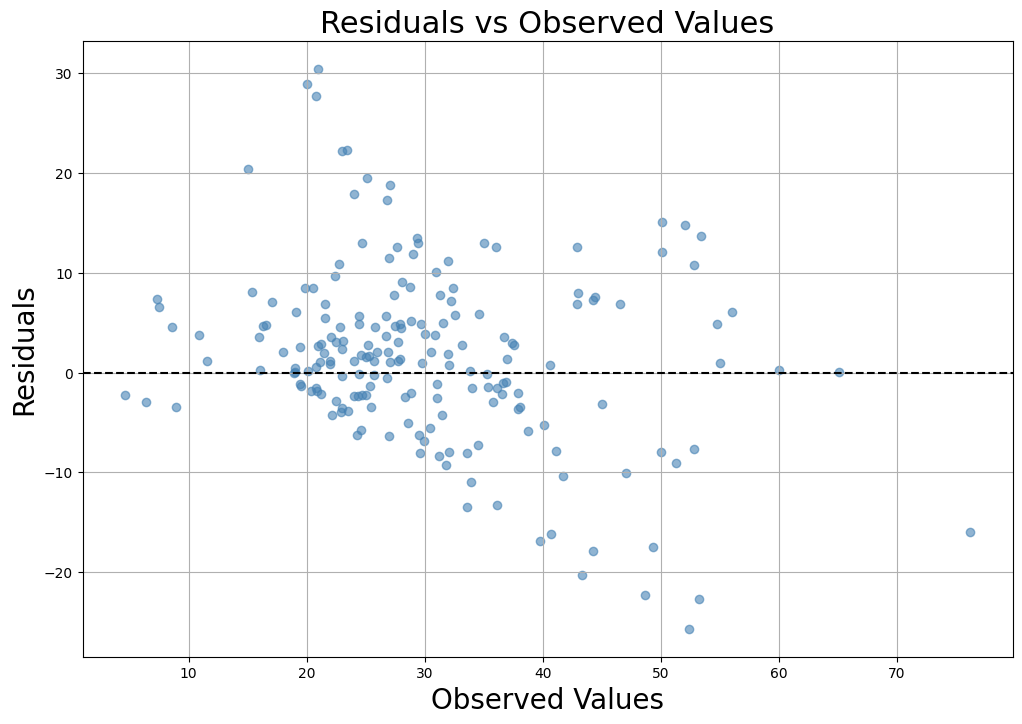

In [137]:
plt.figure(figsize=(12, 8))
plt.scatter(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Residuals'], alpha=0.6, color='steelblue')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Observed Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Observed Values', fontsize=22)
plt.grid(True)
plt.show()


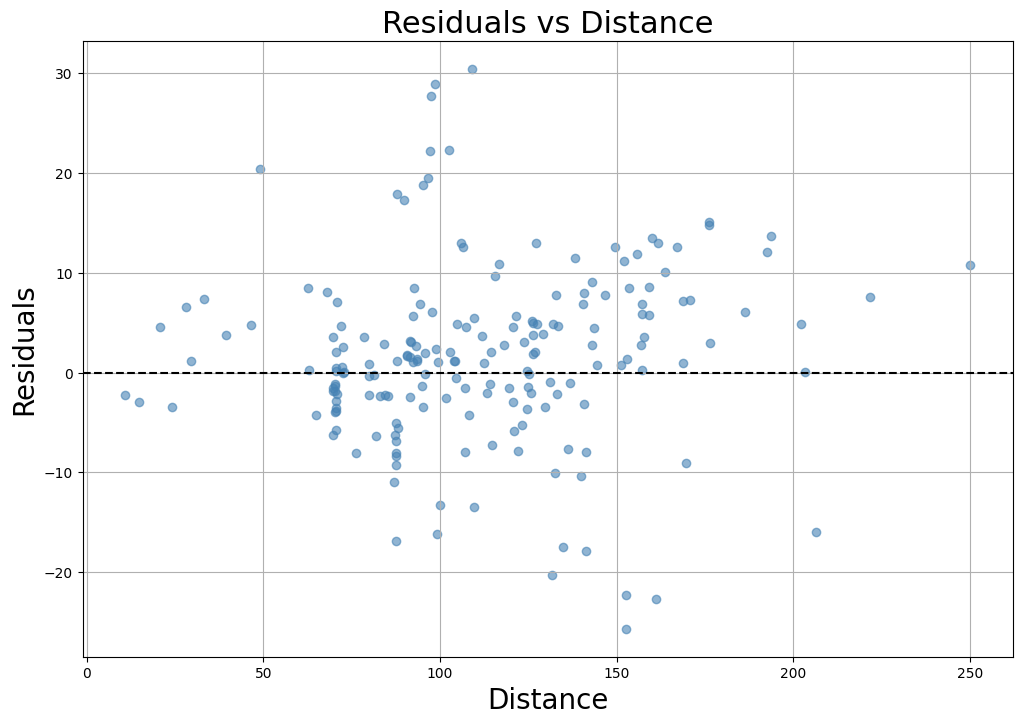

In [138]:
plt.figure(figsize=(12, 8))
plt.scatter(test_df_heb_vehicle['dist'], test_df_heb_vehicle['Residuals'], alpha=0.6, color='steelblue')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Distance', fontsize=22)
plt.grid(True)
plt.show()


In [139]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])
print("Mean Absolute Error (MAE):", mae)


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)

from sklearn.metrics import r2_score
r2 = r2_score(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])
print("R-squared (R²):", r2)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

import numpy as np

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)


Mean Absolute Error (MAE): 6.503235166214223
Root Mean Square Error (RMSE): 8.981752879367416
R-squared (R²): 0.37909796775454685
Mean Absolute Percentage Error (MAPE): 23.66924111812497
Symmetric Mean Absolute Percentage Error (sMAPE): 21.37805527499025
Median Absolute Percentage Error (MdAPE): 16.45101993607222


## Calculate validation performance metrics using average values

#### HEB: 5.84 mpg = 0.17 gpm

In [140]:
test_df_heb_vehicle['average_gallon']=test_df_heb_vehicle['dist']*0.17
test_df_heb_vehicle.head()

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
673          704  12337     1805  28.83  2022-04-14 21:42:00         295668   
1038        1080   4145     7902  50.00  2022-09-13 05:26:00         209323   
169          178  11933     1802  22.84  2022-04-19 18:49:00         365073   
107          114  11890     1801  40.60  2022-06-10 22:15:00              0   
51            54  11830     1801  25.71  2022-03-09 20:32:00         348765   

     Fuel Orfluid Type Powertrain        dist     Energy  actual_mpg  \
673                DIE     hybrid  126.103481  33.972013    4.374037   
1038               DIE     hybrid  141.479092  42.078919    2.829582   
169                DIE     hybrid  107.319430  27.385720    4.698749   
107                DIE     hybrid  151.219693  41.395751    3.724623   
51                 DIE     hybrid   81.475234  25.434815    3.169009   

      pred_mpg  Residuals  average_gallon  
673   3.711981   5.142013       21.437592  
1038  3.362232  -7.921081       24.051446  
169   3.918810   4.545720       18.244303  
107   3.653025   0.795751       25.707348  
51    3.203296  -0.275185       13.850790

In [141]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df_heb_vehicle['average_gallon'], test_df_heb_vehicle['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 72.16338461303364


In [142]:
trimmed_validation_heb['ServiceDateTime'] = pd.to_datetime(trimmed_validation_heb['ServiceDateTime'])
trimmed_validation_heb = trimmed_validation_heb.set_index('ServiceDateTime')
weekly_energy_heb = trimmed_validation_heb[['Energy','Qty']].resample('W').sum()
weekly_energy_heb=weekly_energy_heb.reset_index()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_32428\714379725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_validation_heb['ServiceDateTime'] = pd.to_datetime(trimmed_validation_heb['ServiceDateTime'])


In [143]:
train_df_heb_system, test_df_heb_system = train_test_split(weekly_energy_heb, test_size=0.2, random_state=42)

In [144]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_heb_system['Qty'], test_df_heb_system['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.08
RMSE: 63.84


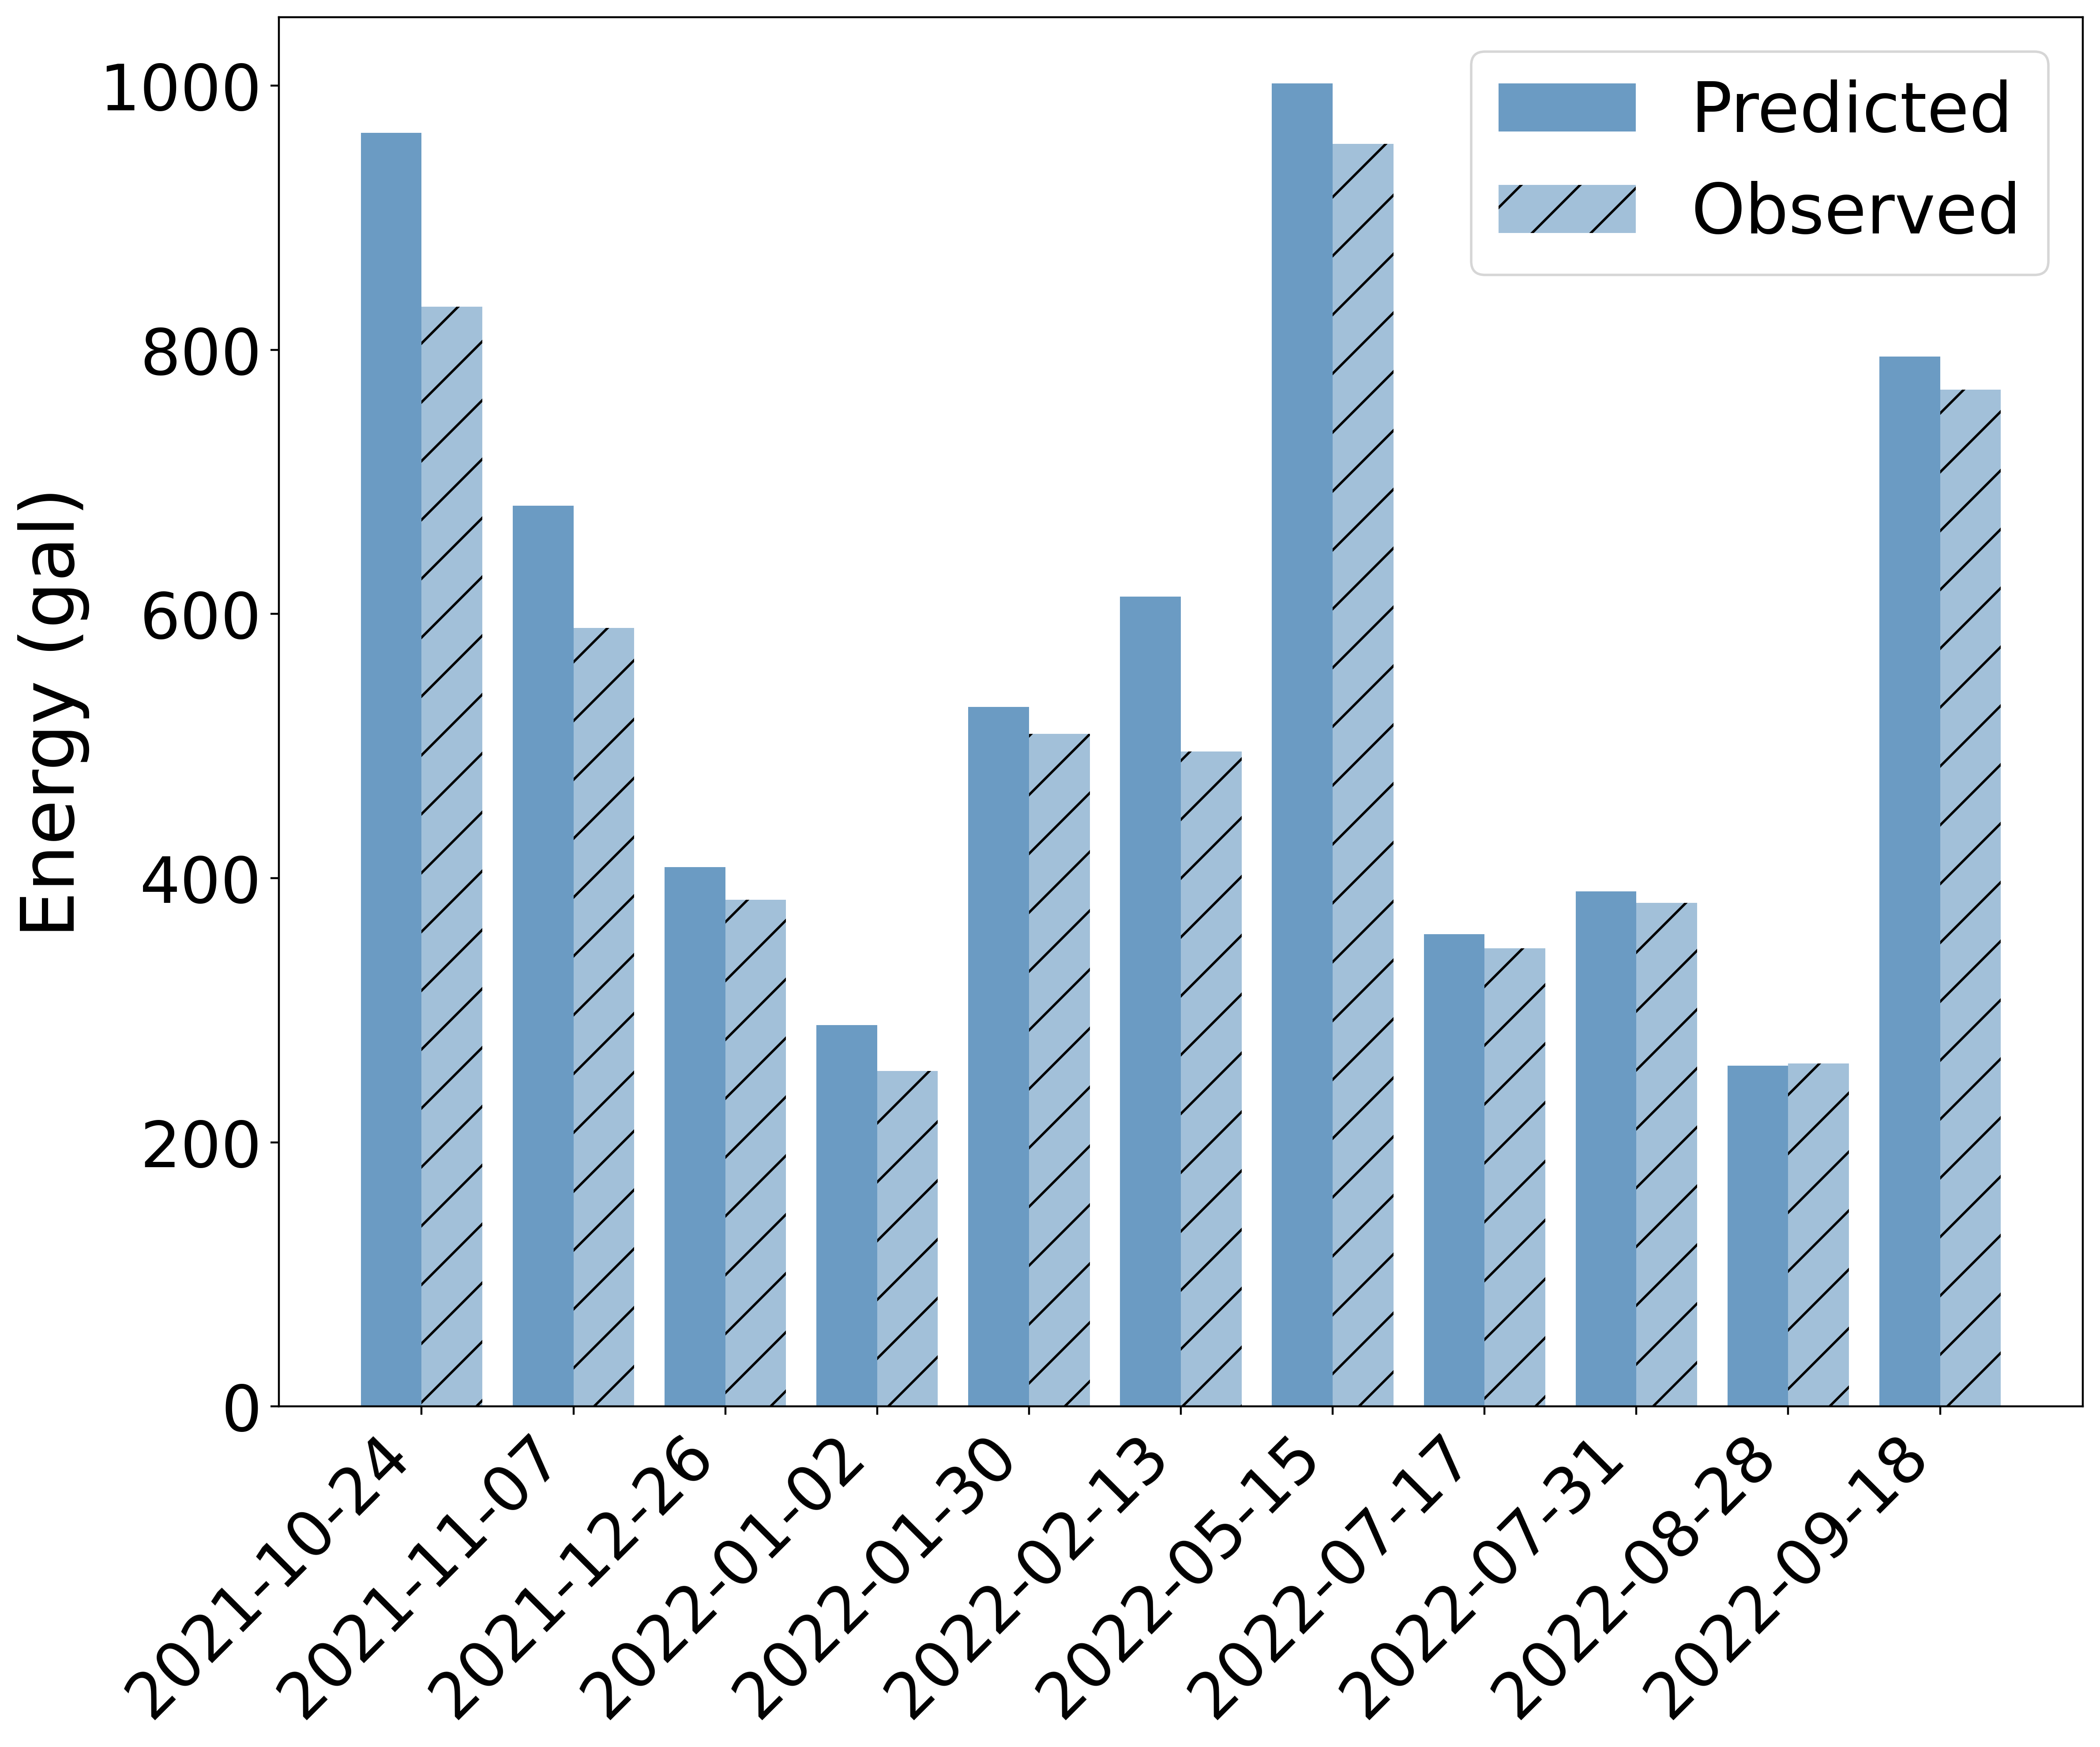

In [145]:
# Ensure 'ServiceDateTime' is a datetime object
test_df_heb_system['ServiceDateTime'] = pd.to_datetime(test_df_heb_system['ServiceDateTime'])
test_df_heb_system = test_df_heb_system.sort_values('ServiceDateTime')


# Set 'ServiceDateTime' as index for plotting purposes
test_df_heb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_heb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_heb_system['Energy'], width=bar_width, color='steelblue', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_heb_system['Qty'], width=bar_width, color='steelblue', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_heb_system.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=26)
plt.yticks(fontsize=26)


plt.ylabel('Energy (gal)', fontsize=30)
plt.legend(fontsize=28)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-HEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'ServiceDateTime' is a datetime object
test_df_heb_system['ServiceDateTime'] = pd.to_datetime(test_df_heb_system['ServiceDateTime'])
test_df_heb_system = test_df_heb_system.sort_values('ServiceDateTime')

# Set 'ServiceDateTime' as index for plotting purposes
test_df_heb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_heb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_heb_system['Energy'], width=bar_width, color='steelblue', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_heb_system['Qty'], width=bar_width, color='steelblue', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_heb_system.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=26)
plt.yticks(fontsize=26)

# Add annotation for MAPE
plt.text(0.95, 0.95, 'MAPE: 13%', transform=plt.gca().transAxes, fontsize=28,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.ylabel('Energy (gal)', fontsize=30)
plt.legend(fontsize=28)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-HEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


KeyError: 'ServiceDateTime'

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])
print("Mean Absolute Error (MAE):", mae)


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)

from sklearn.metrics import r2_score
r2 = r2_score(test_df_heb_system['Qty'], test_df_heb_system['Energy'])
print("R-squared (R²):", r2)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

import numpy as np

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)


### CDB

In [12]:
validation_cdb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-cdb-oct2021-sep2022-12212023.csv', delimiter=',', skiprows=0, low_memory=False)

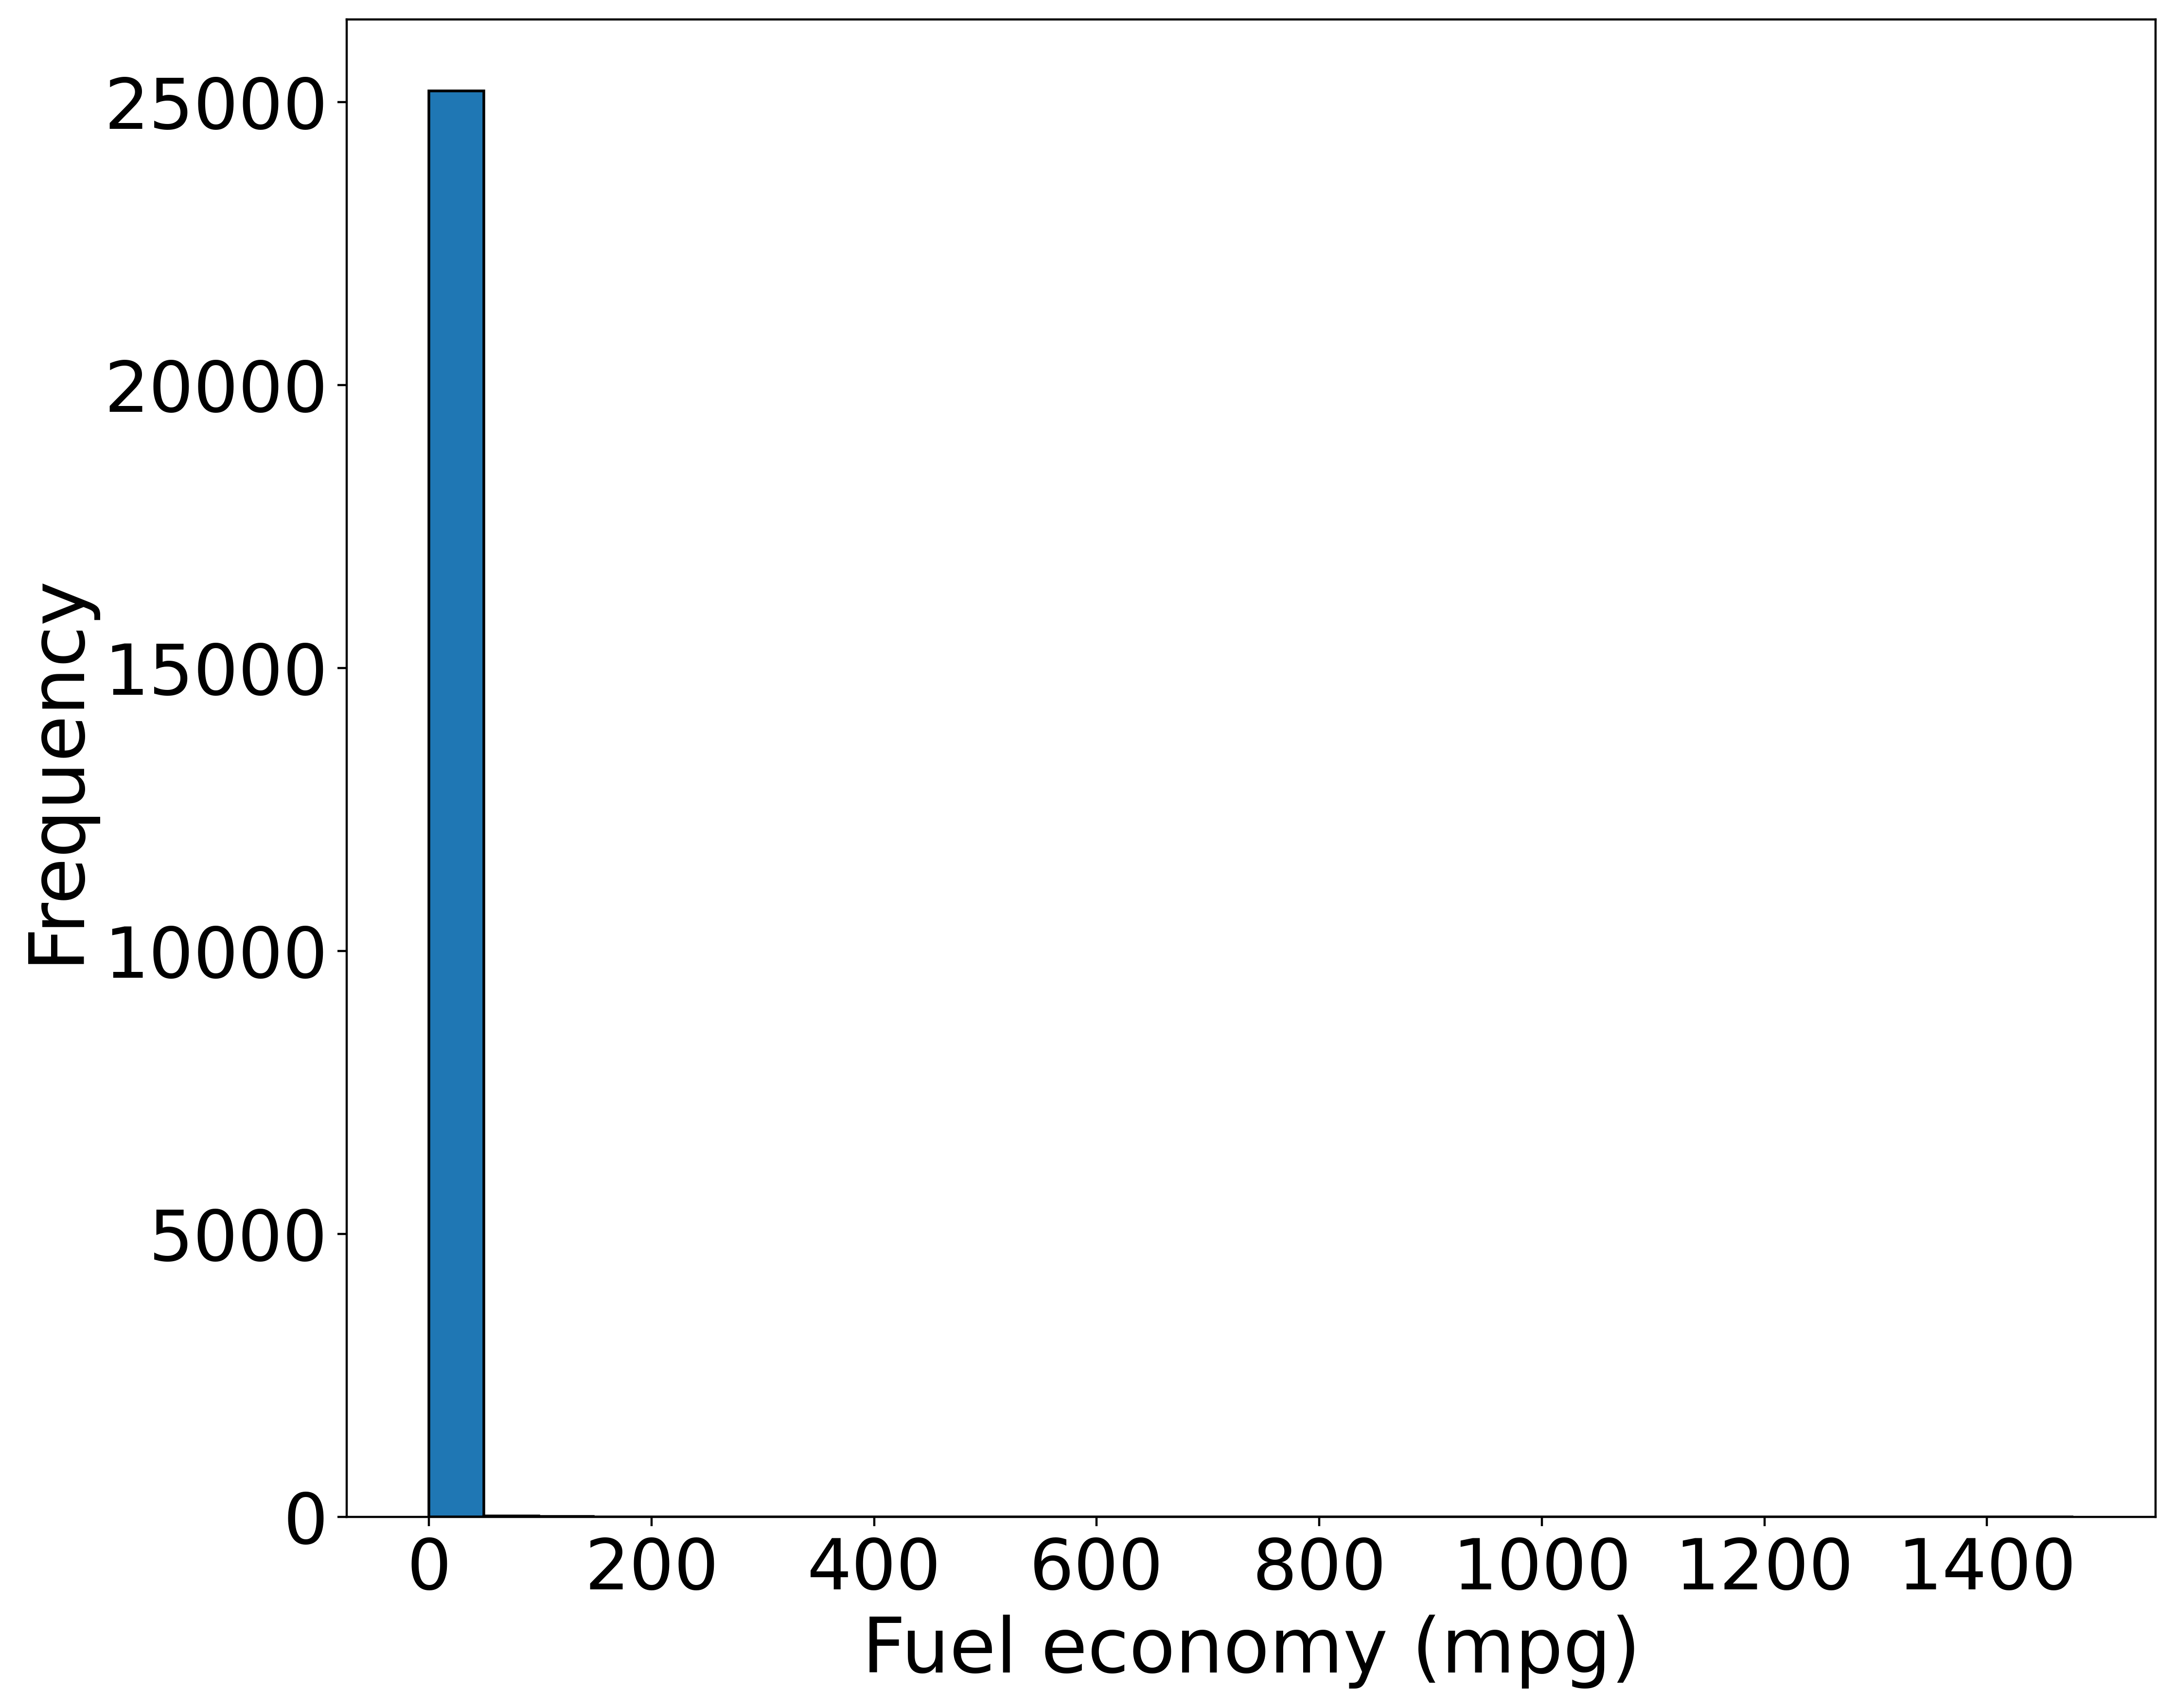

In [13]:
plt.figure(figsize=(12, 10), dpi=400)

validation_cdb['actual_mpg']=validation_cdb['dist']/validation_cdb['Qty']
validation_cdb['pred_mpg']=validation_cdb['dist']/validation_cdb['Energy']
plt.hist(validation_cdb['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('Fuel economy (mpg)',fontsize=28)
plt.ylabel('Frequency',fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

#plt.title('Histogram of actual MPGs for cdb')
plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_df['actual_mpg'] contains your data
data = validation_cdb['actual_mpg']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('MPG')
plt.ylabel('CDF')
plt.title('CDF of actual MPG for CDB')
plt.grid(True)
plt.show()


In [15]:
data_sorted

array([0.00000000e+00, 4.73124416e-03, 8.30570967e-03, ...,
       8.02851202e+02, 9.73219355e+02, 1.47768061e+03])

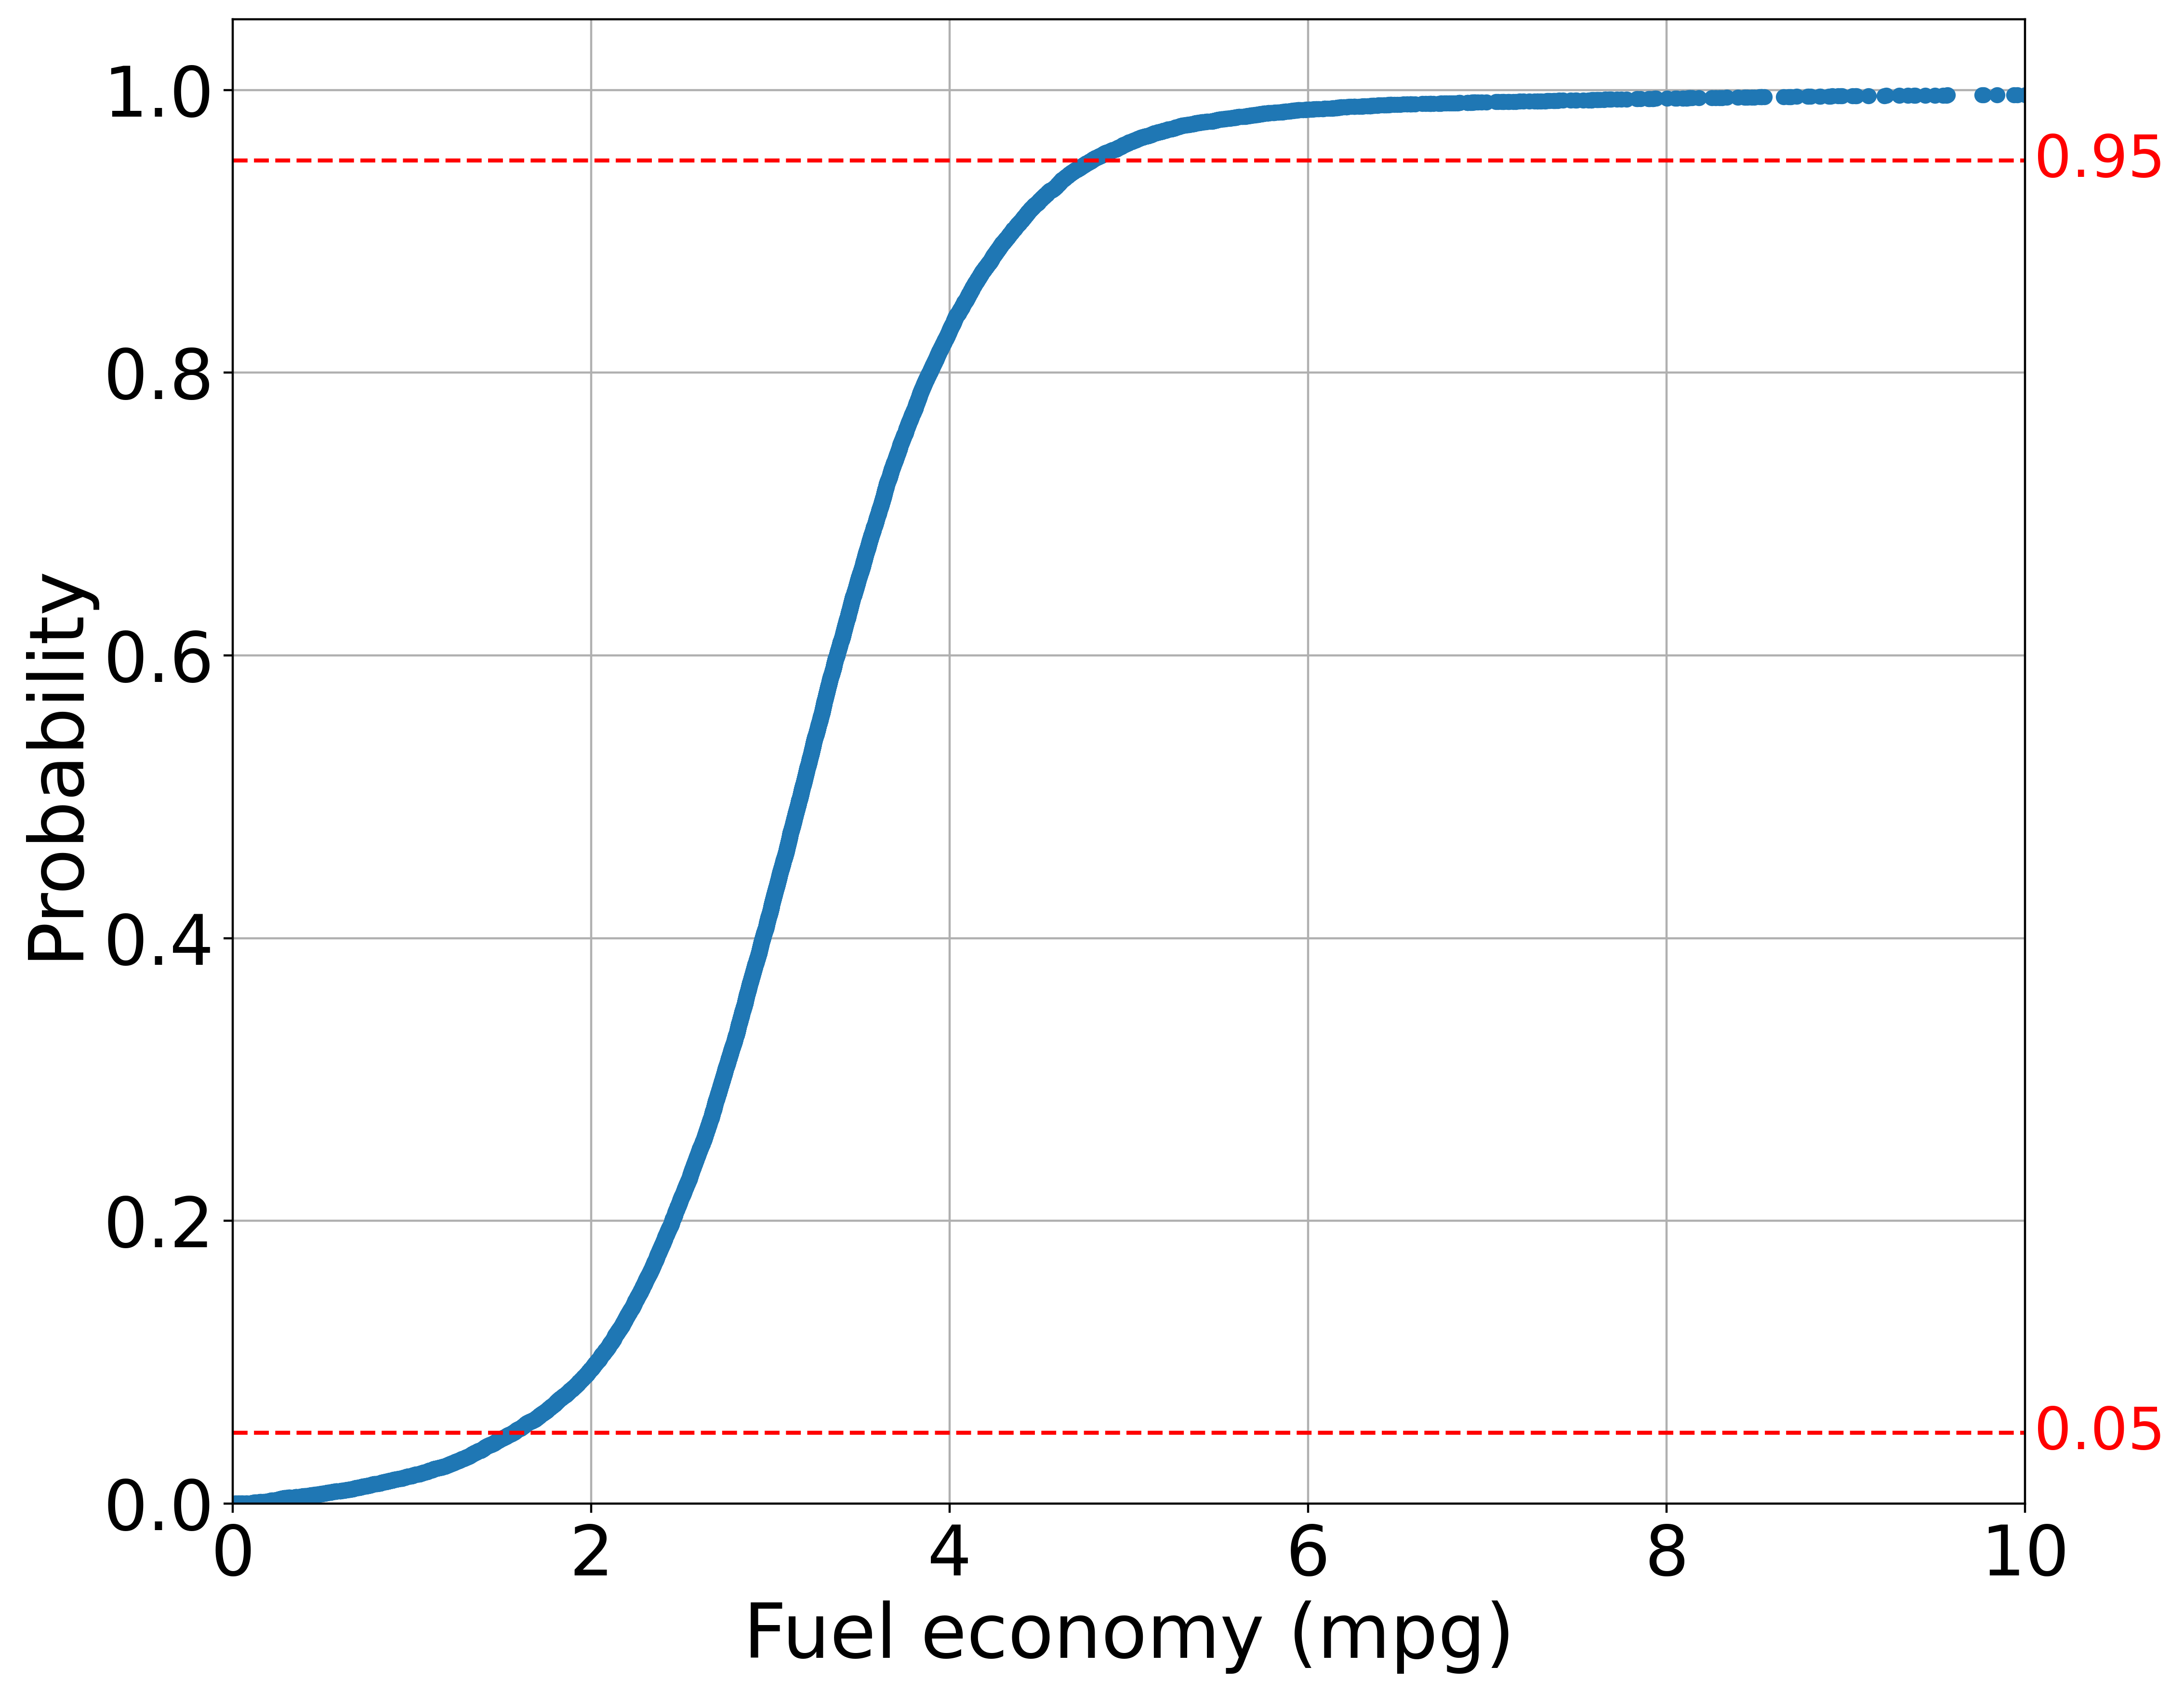

In [16]:
import matplotlib.pyplot as plt
import numpy as np



# Assuming merged_df['actual_mpg'] contains your data
data = validation_cdb['actual_mpg']

# Calculate the CDF values
data_sorted = np.sort(data)
data_sorted_filtered = data_sorted[data_sorted <= 30]

cdf = np.arange(1, len(data_sorted_filtered)+1) / len(data_sorted_filtered)

plt.figure(figsize=(12, 10), dpi=400)


# Create a CDF plot
plt.plot(data_sorted_filtered, cdf, marker='.', linestyle='none', markersize=10)

# Calculate the data values at 0.1% and 99.99% percentiles
low_percentile_value = np.percentile(data_sorted_filtered, 0.1)
high_percentile_value = np.percentile(data_sorted_filtered, 99.99)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
#plt.text(max(data_sorted_filtered)*1.05, 0.05, '0.05', verticalalignment='center', color='r', fontsize=22)
#plt.text(max(data_sorted_filtered)*1.05, 0.95, '0.95', verticalalignment='center', color='r', fontsize=22)
plt.text(10.05, 0.05, '0.05', verticalalignment='center', color='r', fontsize=22)
plt.text(10.05, 0.95, '0.95', verticalalignment='center', color='r', fontsize=22)

plt.xlabel('Fuel economy (mpg)', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.xlim([0, 10])  # Limiting x-axis to 0-30
plt.ylim([0, 1.05])  # Limiting x-axis to 0-30


plt.grid(True)
plt.show()



In [17]:
top_10_rows = validation_cdb.nlargest(20, 'actual_mpg')
top_10_rows

Unnamed: 0  index  Vehicle   Qty      ServiceDateTime  Meter1Reading  \
4110         4313   5962     1644  0.05  2022-01-18 22:06:00              0   
505           527   5165     1555  0.06  2022-01-18 16:41:00         355495   
3608         3766   4700     1619  0.04  2022-01-19 15:52:00              0   
15711       16399  13993     1835  2.50  2022-01-19 16:26:00              0   
23519       24560   1350     7802  1.20  2021-12-10 06:21:00         396874   
23509       24548   1338     7802  1.50  2021-11-29 05:55:00         395311   
4088         4284   5933     1644  0.68  2021-10-27 20:53:00         359880   
24788       25862   2351     7815  1.20  2022-02-21 07:58:00         338325   
22535       23541     90     7610  1.20  2022-03-11 20:55:00         511675   
24465       25530   2083     7814  1.00  2021-10-29 17:32:00         350558   
23538       24580   1370     7802  1.40  2022-01-13 05:36:00         399080   
22634       23643    498     7660  1.00  2021-12-14 16:09:00         499365   
21992       22980   2792     7553  1.00  2022-01-20 18:39:00          55994   
24471       25537   2090     7814  1.20  2021-11-05 18:00:00         351434   
21770       22750   1002     7552  1.70  2021-12-21 20:01:00         344243   
20450       21376  21127     1860  1.39  2022-01-14 16:12:00          28537   
4889         5151   8742     1652  0.88  2021-11-22 18:55:00              0   
2559         2666   7869     1573  1.83  2022-05-16 18:17:00         337347   
12765       13311  11011     1814  1.98  2021-11-23 19:08:00              0   
4098         4296   5945     1644  2.28  2021-12-03 19:36:00         361575   

      Fuel Orfluid Type    Powertrain        dist      Energy   actual_mpg  \
4110                DIE  conventional   73.884031   37.903812  1477.680610   
505                 DIE  conventional   58.393161   21.812658   973.219355   
3608                DIE  conventional   32.114048   20.663357   802.851202   
15711               DIE  conventional  389.332574  130.094999   155.733030   
23519               DIE  conventional  157.402151   62.442781   131.168459   
23509               DIE  conventional  196.568868   68.147508   131.045912   
4088                DIE  conventional   87.118475   32.738015   128.115405   
24788               DIE  conventional  140.476330   45.322030   117.063608   
22535               DIE  conventional  128.840324   34.994306   107.366936   
24465               DIE  conventional  104.639550   32.992146   104.639550   
23538               DIE  conventional  141.457145   46.608666   101.040818   
22634               DIE  conventional   97.334818   27.065230    97.334818   
21992               DIE  conventional   91.492933   30.282199    91.492933   
24471               DIE  conventional  106.514159   35.393125    88.761799   
21770               DIE  conventional  144.313462   38.974158    84.890272   
20450               DIE  conventional  109.243942   39.584254    78.592764   
4889                DIE  conventional   66.643795   16.524775    75.731585   
2559                DIE  conventional  123.447939   35.060284    67.457890   
12765               DIE  conventional  132.720691   41.821439    67.030652   
4098                DIE  conventional  152.776362   34.697295    67.007176   

       pred_mpg  
4110   1.949251  
505    2.677031  
3608   1.554154  
15711  2.992679  
23519  2.520742  
23509  2.884462  
4088   2.661080  
24788  3.099515  
22535  3.681751  
24465  3.171650  
23538  3.034997  
22634  3.596305  
21992  3.021344  
24471  3.009459  
21770  3.702799  
20450  2.759783  
4889   4.032962  
2559   3.521019  
12765  3.173508  
4098   4.403120

In [18]:
# Calculate the 5st and 95th percentiles
percentile_5 = validation_cdb['actual_mpg'].quantile(0.05)
percentile_95 = validation_cdb['actual_mpg'].quantile(0.95)

# Filter the DataFrame
#trimmed_validation_cdb = validation_cdb[(validation_cdb['pred_mpg'] >= percentile_5) & (validation_cdb['pred_mpg'] <= percentile_95)]
#trimmed_validation_cdb = trimmed_validation_cdb[(trimmed_validation_cdb['actual_mpg'] >= percentile_5) & (trimmed_validation_cdb['actual_mpg'] <= percentile_95)]
trimmed_validation_cdb = validation_cdb[(validation_cdb['actual_mpg'] >= percentile_5) & (validation_cdb['actual_mpg'] <= percentile_95)]

In [20]:
trimmed_validation_cdb['actual_mpg'].mean()

3.1750484656888824

In [21]:
trimmed_validation_cdb['pred_mpg'].mean()

2.9625370676933085

In [ ]:
top_150_actual_mpg = trimmed_validation_cdb.nlargest(150, 'actual_mpg')
top_150_actual_mpg

In [ ]:
low_200_actual_mpg = trimmed_validation_cdb.nsmallest(200, 'actual_mpg')
low_200_actual_mpg

In [ ]:
trimmed_validation_cdb=trimmed_validation_cdb.loc[trimmed_validation_cdb['index']!=18223]

In [ ]:
train_df_cdb_vehicle, test_df_cdb_vehicle = train_test_split(trimmed_validation_cdb, test_size=0.2, random_state=42)

In [ ]:
# Compute MAPE
mape = mean_absolute_percentage_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
plt.hist(trimmed_validation_cdb['actual_mpg'], bins=30, edgecolor='black') 
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of actual MPGs for cdb')
plt.show()

In [ ]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(12, 10), dpi=400)

# create a scatter plot of predicted vs observed
plt.scatter(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'], alpha=0.8, s=100, color='lightcoral', zorder=2)

# Calculate the minimum and maximum limits for x and y axes
xlim = ylim = (0, 120)
xy_min = min(xlim[0], ylim[0])
xy_max = max(xlim[1], ylim[1])

# add a reference line showing perfect agreement between predicted and observed values
plt.plot([xy_min, xy_max], [xy_min, xy_max], color='black', linestyle='dashed', zorder=2)

# set the axis limits
plt.xlim(xlim)
plt.ylim(ylim)

# set the axis labels
plt.ylabel('Predicted (gallons)', fontsize=30)
plt.xlabel('Observed (gallons)', fontsize=30)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Adding gridlines to the plot
plt.grid(True, zorder=1)

# Use tight_layout to ensure proper alignment
plt.tight_layout()

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/CDB-observed-vs-predicted-sep2021-oct2022.png', dpi=400, bbox_inches='tight')

### Residual analysis 

In [ ]:
test_df_cdb_vehicle['Residuals'] = test_df_cdb_vehicle['Energy'] - test_df_cdb_vehicle['Qty']

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(test_df_cdb_vehicle['Energy'], test_df_cdb_vehicle['Residuals'], alpha=0.6, color='lightcoral')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Predicted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Predicted Values', fontsize=22)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Residuals'], alpha=0.6, color='lightcoral')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Observed Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Observed Values', fontsize=22)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(test_df_cdb_vehicle['dist'], test_df_cdb_vehicle['Residuals'], alpha=0.6, color='lightcoral')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs distance', fontsize=22)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])
print("Mean Absolute Error (MAE):", mae)


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)

from sklearn.metrics import r2_score
r2 = r2_score(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])
print("R-squared (R²):", r2)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

import numpy as np

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)


## Calculate validation performance metrics using average values

#### CDB: 4.82 mpg = 0.21 gpm

In [ ]:
test_df_cdb_vehicle['average_gallon']=test_df_cdb_vehicle['dist']*0.21
test_df_cdb_vehicle.head()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df_cdb_vehicle['average_gallon'], test_df_cdb_vehicle['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
trimmed_validation_cdb['ServiceDateTime'] = pd.to_datetime(trimmed_validation_cdb['ServiceDateTime'])
trimmed_validation_cdb = trimmed_validation_cdb.set_index('ServiceDateTime')
weekly_energy_cdb = trimmed_validation_cdb[['Energy','Qty']].resample('W').sum()
weekly_energy_cdb=weekly_energy_cdb.reset_index()

In [ ]:
train_df_cdb_system, test_df_cdb_system = train_test_split(weekly_energy_cdb, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'ServiceDateTime' is a datetime object
test_df_cdb_system['ServiceDateTime'] = pd.to_datetime(test_df_cdb_system['ServiceDateTime'])
test_df_cdb_system = test_df_cdb_system.sort_values('ServiceDateTime')


# Set 'ServiceDateTime' as index for plotting purposes
test_df_cdb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_cdb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_cdb_system['Energy'], width=bar_width, color='lightcoral', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_cdb_system['Qty'], width=bar_width, color='lightcoral', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_cdb_system.index.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=26)
plt.yticks(fontsize=26)


plt.ylabel('Energy (gal)', fontsize=30)
plt.legend(fontsize=28)
plt.tight_layout() 

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-CDB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


### Residual analysis

In [ ]:
trimmed_validation_cdb['Residuals'] = trimmed_validation_cdb['Energy'] - trimmed_validation_cdb['Qty']

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(trimmed_validation_cdb['Energy'], trimmed_validation_cdb['Residuals'], alpha=0.6, color='lightcoral')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Predicted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Predicted Values', fontsize=22)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Residuals'], alpha=0.6, color='lightcoral')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Observed Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Observed Values', fontsize=22)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(trimmed_validation_cdb['dist'], trimmed_validation_cdb['Residuals'], alpha=0.6, color='lightcoral')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs distance', fontsize=22)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Energy'])
print("Mean Absolute Error (MAE):", mae)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Energy'])
print("R-squared (R²):", r2)


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)


In [ ]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)


In [ ]:
def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(trimmed_validation_cdb['Qty'], trimmed_validation_cdb['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])
print("Mean Absolute Error (MAE):", mae)


from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'], squared=False)
print("Root Mean Square Error (RMSE):", rmse)

from sklearn.metrics import r2_score
r2 = r2_score(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])
print("R-squared (R²):", r2)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])
print("Mean Absolute Percentage Error (MAPE):", mape)

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape = symmetric_mean_absolute_percentage_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

import numpy as np

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

mdape = median_absolute_percentage_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])
print("Median Absolute Percentage Error (MdAPE):", mdape)
